## Spark Foundation Internship
## Data Science and Business Analytics
## Task 5
## Exploratory Data Analysis-Sports

### Problem Statement:
Perform 'Exploratory Data Analysis' on dataset 'Indian Premier League'.
As a Sports Analysts,find out the most successful teams,players and factors contributing win or loss of a team.
Suggest teams or players a company should endorse for its products.


### Prediction:

Give detailed analysis,annotations,animations and images as the storyboard for the IPL match with graphical representation.

#Load necessary libraries

In [1]:
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv(r'C:\Users\Srividya\Downloads\Indian Premier League\matches.csv')
df.to_csv("Exploratory_Data_Analysis_matches.csv",sep='\t')

### Match Details  Overview

In [2]:
#create dataframe
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
df.columns #checking column names

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [4]:
df1=pd.read_csv(r'C:\Users\Srividya\Downloads\Indian Premier League\deliveries.csv')
df1.to_csv("Exploratory_Data_Analysis_deliveries.csv",sep='\t')

### Individual Scores

In [5]:
df1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [6]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

##### Getting column Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Exploratory Data Analysis

In [186]:
#tells shape of dataframe
df.shape

(756, 17)

In [10]:
df.isnull().sum() #checking null values

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Umpire 3 column has more than 60% of null values.Unable to get better insight with this so we can drop this column

In [11]:
df1.shape

(179078, 21)

In [12]:
df1.isnull().sum() #checking null values

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

player_dismissed,dismissal_kind,fielder these columns has null values and not much needed column for our analysis.Hence for cleaning purpose we can drop these columns too.

In [13]:
#drop unwanted columns
df.drop(['umpire3'], axis=1, inplace=True)

In [187]:
#replacing null values with simpleimputer using  most frquent values of columns
import numpy as np
from sklearn.impute import SimpleImputer
for col in [ 'city','winner','player_of_match','umpire1','umpire2']:
    imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
    df[col]=imp.fit_transform(df[col].values.reshape(-1,1))

In [15]:
#drop unwanted columns
df1.drop(['player_dismissed','dismissal_kind', 'fielder'], axis=1, inplace=True)

In [16]:
df.isnull().sum() #checking null values

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

There is no null values now.

In [17]:
df1.isnull().sum() #checking null values

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

There is no null values now.Cleaned the columns successfully.

In [18]:
df.groupby(['winner'])['win_by_runs'].agg({'sum'})

,sum
winner,
Chennai Super Kings,1778
Deccan Chargers,421
Delhi Capitals,92
Delhi Daredevils,675
Gujarat Lions,1
Kings XI Punjab,925
Kochi Tuskers Kerala,23
Kolkata Knight Riders,1086
Mumbai Indians,1866


Mumbai Indians and Chennai Super kings are the Top Winners and they win by runs.

In [19]:
df.groupby(['winner'])['win_by_wickets'].agg({'sum'})

,sum
winner,
Chennai Super Kings,289
Deccan Chargers,72
Delhi Capitals,29
Delhi Daredevils,275
Gujarat Lions,65
Kings XI Punjab,268
Kochi Tuskers Kerala,30
Kolkata Knight Riders,351
Mumbai Indians,307


In [238]:
df1.groupby(['batsman'])['batsman_runs'].agg({'sum'}).T

batsman,A Ashish Reddy,A Chandila,A Chopra,A Choudhary,A Dananjaya,A Flintoff,A Hales,A Joseph,A Kumble,A Mishra,A Mithun,A Mukund,A Nehra,A Singh,A Symonds,A Turner,A Uniyal,A Zampa,AA Bilakhia,AA Chavan,AA Jhunjhunwala,AA Noffke,AB Agarkar,AB Barath,AB Dinda,AB McDonald,AB de Villiers,AC Blizzard,AC Gilchrist,AC Thomas,AC Voges,AD Mascarenhas,AD Mathews,AD Nath,AD Russell,AF Milne,AG Murtaza,AG Paunikar,AJ Finch,AJ Tye,AL Menaria,AM Nayar,AM Rahane,AN Ahmed,AN Ghosh,AP Dole,AP Majumdar,AP Tare,AR Bawne,AR Patel,AS Rajpoot,AS Raut,AS Yadav,AT Rayudu,AUK Pathan,Abdur Razzak,Anirudh Singh,Ankit Sharma,Ankit Soni,Anureet Singh,Avesh Khan,Azhar Mahmood,B Akhil,B Chipli,B Kumar,B Laughlin,B Lee,B Stanlake,B Sumanth,BA Bhatt,BA Stokes,BAW Mendis,BB McCullum,BB Samantray,BB Sran,BCJ Cutting,BE Hendricks,BJ Haddin,BJ Hodge,BJ Rohrer,BMAJ Mendis,BR Dunk,Basil Thampi,Bipul Sharma,C Ingram,C Madan,C Munro,C Nanda,C de Grandhomme,CA Ingram,CA Lynn,CA Pujara,CH Gayle,CH Morris,CJ Anderson,CJ Ferguson,CJ Jordan,CJ McKay,CK Kapugedera,CK Langeveldt,CL White,CM Gautam,CR Brathwaite,CR Woakes,CRD Fernando,D Kalyankrishna,D Salunkhe,D Shorey,D Short,D Wiese,D du Preez,DA Miller,DA Warner,DAJ Bracewell,DB Das,DB Ravi Teja,DE Bollinger,DH Yagnik,DJ Bravo,DJ Harris,DJ Hooda,DJ Hussey,DJ Jacobs,DJ Muthuswami,DJ Thornely,DJG Sammy,DL Chahar,DL Vettori,DM Bravo,DNT Zoysa,DP Nannes,DP Vijaykumar,DPMD Jayawardene,DR Martyn,DR Smith,DS Kulkarni,DS Lehmann,DT Christian,DT Patil,DW Steyn,E Lewis,EJG Morgan,ER Dwivedi,F Behardien,F du Plessis,FH Edwards,FY Fazal,G Gambhir,GB Hogg,GC Smith,GD McGrath,GH Vihari,GJ Bailey,GJ Maxwell,GR Napier,Gurkeerat Singh,H Brar,H Das,H Gurney,H Klaasen,H Vihari,H Viljoen,HH Gibbs,HH Pandya,HM Amla,HV Patel,Harbhajan Singh,Harmeet Singh,Harpreet Singh,I Malhotra,I Sharma,I Sodhi,IC Pandey,IK Pathan,IR Jaggi,Imran Tahir,Iqbal Abdulla,Ishan Kishan,J Archer,J Arunkumar,J Bairstow,J Botha,J Denly,J Searles,J Suchith,J Syed Mohammad,J Theron,J Yadav,JA Morkel,JC Buttler,JD Ryder,JD Unadkat,JDP Oram,JDS Neesham,JE Taylor,JEC Franklin,JH Kallis,JJ Bumrah,JJ Roy,JJ van der Wath,JM Kemp,JO Holder,JP Duminy,JP Faulkner,JR Hopes,Jaskaran Singh,Joginder Sharma,K Ahmed,K Goel,K Gowtham,K Paul,K Rabada,K Upadhyay,KA Pollard,KAJ Roach,KB Arun Karthik,KC Cariappa,KC Sangakkara,KD Karthik,KH Pandya,KJ Abbott,KK Cooper,KK Nair,KL Rahul,KM Jadhav,KMDN Kulasekara,KP Appanna,KP Pietersen,KS Williamson,KV Sharma,KW Richardson,Kamran Akmal,Kamran Khan,Karanveer Singh,Kuldeep Yadav,L Ablish,L Balaji,L Livingstone,L Plunkett,L Ronchi,LA Carseldine,LA Pomersbach,LH Ferguson,LJ Wright,LMP Simmons,LPC Silva,LR Shukla,LRPL Taylor,M Ali,M Ashwin,M Kaif,M Kartik,M Klinger,M Lomror,M Manhas,M Markande,M Morkel,M Muralitharan,M Ntini,M Rawat,M Santner,M Ur Rahman,M Vijay,M Vohra,M Wood,M de Lange,MA Agarwal,MA Khote,MA Starc,MC Henriques,MC Juneja,MD Mishra,MDKJ Perera,MEK Hussey,MF Maharoof,MG Johnson,MJ Clarke,MJ Guptill,MJ Lumb,MJ McClenaghan,MK Pandey,MK Tiwary,ML Hayden,MM Patel,MM Sharma,MN Samuels,MN van Wyk,MP Stoinis,MR Marsh,MS Bisla,MS Dhoni,MS Gony,MS Wade,MV Boucher,Mandeep Singh,Mashrafe Mortaza,Misbah-ul-Haq,Mohammad Ashraful,Mohammad Asif,Mohammad Hafeez,Mohammad Nabi,Mohammed Shami,Mohammed Siraj,Mustafizur Rahman,N Naik,N Pooran,N Rana,N Saini,ND Doshi,NJ Maddinson,NJ Rimmington,NL McCullum,NLTC Perera,NM Coulter-Nile,NS Naik,NV Ojha,Niraj Patel,OA Shah,P Awana,P Chopra,P Dogra,P Krishna,P Kumar,P Negi,P Parameswaran,P R Barman,P Raj,P Sahu,P Shaw,PA Patel,PA Reddy,PC Valthaty,PD Collingwood,PJ Cummins,PJ Sangwan,PM Sarvesh Kumar,PP Chawla,PP Ojha,PR Shah,PSP Handscomb,PV Tambe,Pankaj Singh,Parvez Rasool,Q de Kock,R Ashwin,R Bhatia,R Bhui,R Bishnoi,R Dhawan,R Dravid,R McLaren,R Ninan,R Parag,R Rampaul,R Salam,R Sathish,R Sharma,R Shukla,R Singh,R Tewatia,R Vinay Kumar,RA Jadeja,RA Tripathi,RD Chahar,RE Levi,RE van der Merwe,RG More,RG Sharma,RJ Harris,RJ Peterson,RJ Quiney,RN ten Doeschate,RP Singh,RR Bhatkal,RR Pant,RR Powar,RR Raje,RR

Kolkata Knight Riders and Royal Challengers Bangalore are the Top Winners and they Win by wickets.

In [20]:
df1.groupby(['over'])['total_runs'].agg({'sum'})

,sum
over,
1,9406
2,10962
3,12118
4,12407
5,12426
6,12512
7,10083
8,10737
9,11127


More runs are scored at 18 th over especially.

In [21]:
df1.groupby(['inning'])['total_runs'].agg({'sum'})

,sum
inning,
1,122763
2,112321
3,113
4,77
5,16


More runs are scored at 1st and 2nd innings.which seems Match went good and normal overall.

### Factors influencing win or loss of a Team

In [25]:
#find correlation co.efficient of all variables in table
df.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


All the columns are negatively correlated with the target column.
1.The column win_by_wickets is most negatively correlated with win_by_runs column.
2.The column win_by_runs is most negatively correlated with win_by_wickets column.
This clearly depicts that Batting team wins the match by win_by_runs and the fielding team wins the match by win_by_wickets.

Hint:Morever if one team wins the other fails thats why these two are negatively correlated.

<AxesSubplot:>

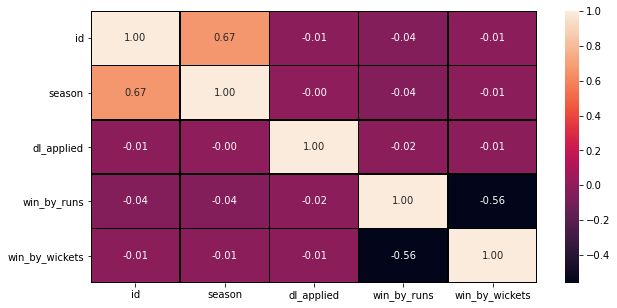

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

Shows the above correlation result in HeatMap

### Visualization of above mentioned correlation

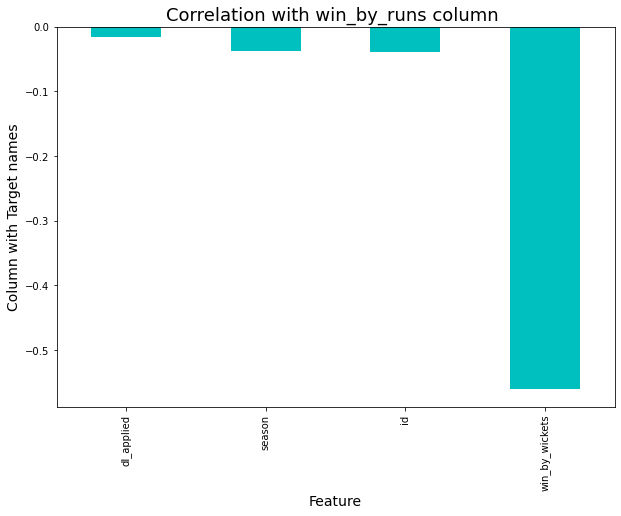

In [36]:
plt.figure(figsize=(10,7))
df.corr()['win_by_runs'].sort_values(ascending=False).drop(['win_by_runs']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation with win_by_runs column ',fontsize=18)
plt.show()

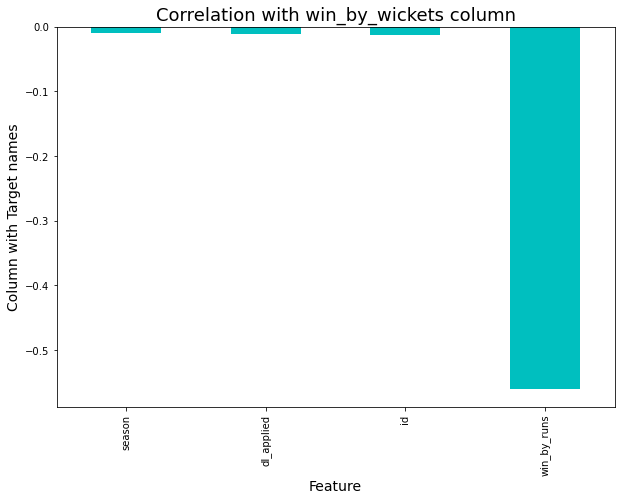

In [37]:
plt.figure(figsize=(10,7))
df.corr()['win_by_wickets'].sort_values(ascending=False).drop(['win_by_wickets']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation with win_by_wickets column',fontsize=18)
plt.show()

In [32]:
#find correlation co.efficient of all variables in table
df1.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.003958,0.008268,-0.001349,-0.009150,-0.007549,0.000905,-0.012429,-0.004623,-0.001475,0.033510,-0.013323,0.030727
inning,0.003958,1.000000,-0.050076,-0.003943,0.084154,0.001201,-0.000757,-0.001996,-0.000904,0.003442,-0.005362,-0.000531,-0.005485
over,0.008268,-0.050076,1.000000,-0.007424,-0.034329,-0.010003,0.012111,-0.004764,0.016984,-0.000979,0.086701,-0.002479,0.086326
ball,-0.001349,-0.003943,-0.007424,1.000000,-0.001143,-0.004665,0.006602,-0.002727,0.000567,0.000711,0.007950,-0.002576,0.007414
is_super_over,-0.009150,0.084154,-0.034329,-0.001143,1.000000,-0.001019,0.001353,0.001735,0.013640,-0.000071,0.010125,0.003504,0.010891
wide_runs,-0.007549,0.001201,-0.010003,-0.004665,-0.001019,1.000000,-0.006196,-0.015855,-0.008675,0.012817,-0.094579,0.720916,0.059077
bye_runs,0.000905,-0.000757,0.012111,0.006602,0.001353,-0.006196,1.000000,-0.004596,-0.002515,-0.000142,-0.018936,0.332352,0.051946
legbye_runs,-0.012429,-0.001996,-0.004764,-0.002727,0.001735,-0.015855,-0.004596,1.000000,-0.006434,-0.000362,-0.070106,0.554458,0.048075
noball_runs,-0.004623,-0.000904,0.016984,0.000567,0.013640,-0.008675,-0.002515,-0.006434,1.000000,-0.000198,0.004832,0.194899,0.046427
penalty_runs,-0.001475,0.003442,-0.000979,0.000711,-0.000071,0.012817,-0.000142,-0.000362,-0.000198,1.000000,-0.002591,0.057882,0.009755


 1.The column batsman_runs is most positively correlated with total_runs column. 
 2.The column inning is most negatively correlated with total_runs column. 
 This clearly depicts that the Total runs Score mainly based on Batsman Score.And Morever if Innings increses the Total Runs score will get reduced.

<AxesSubplot:>

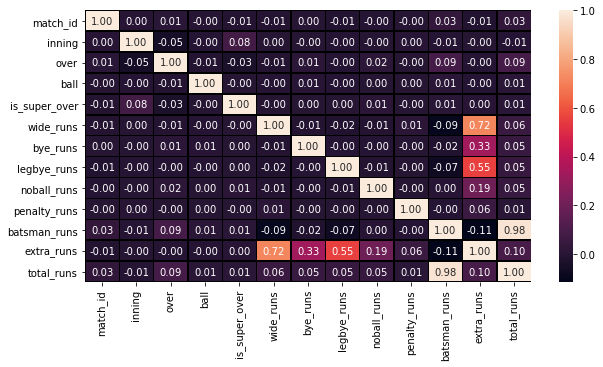

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

Shows the above correlation result in HeatMap

### Visualization of above mentioned correlation

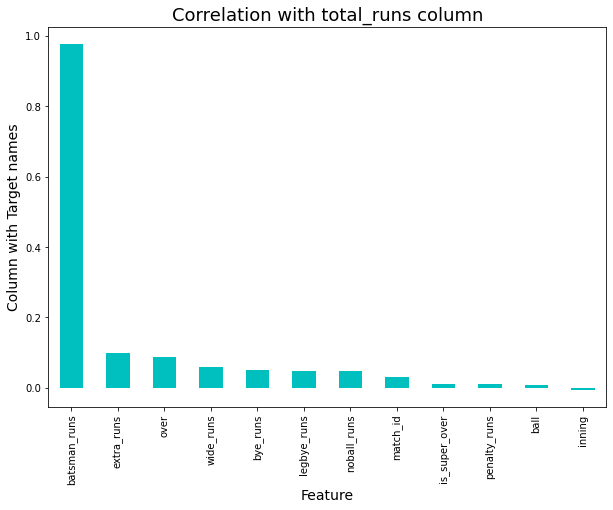

In [38]:
plt.figure(figsize=(10,7))
df1.corr()['total_runs'].sort_values(ascending=False).drop(['total_runs']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation with total_runs column',fontsize=18)
plt.show()

# Dashboard

## Visualization 

## Indian Premier League(IPL) Match - Story Board 

### Most Match Winning Teams

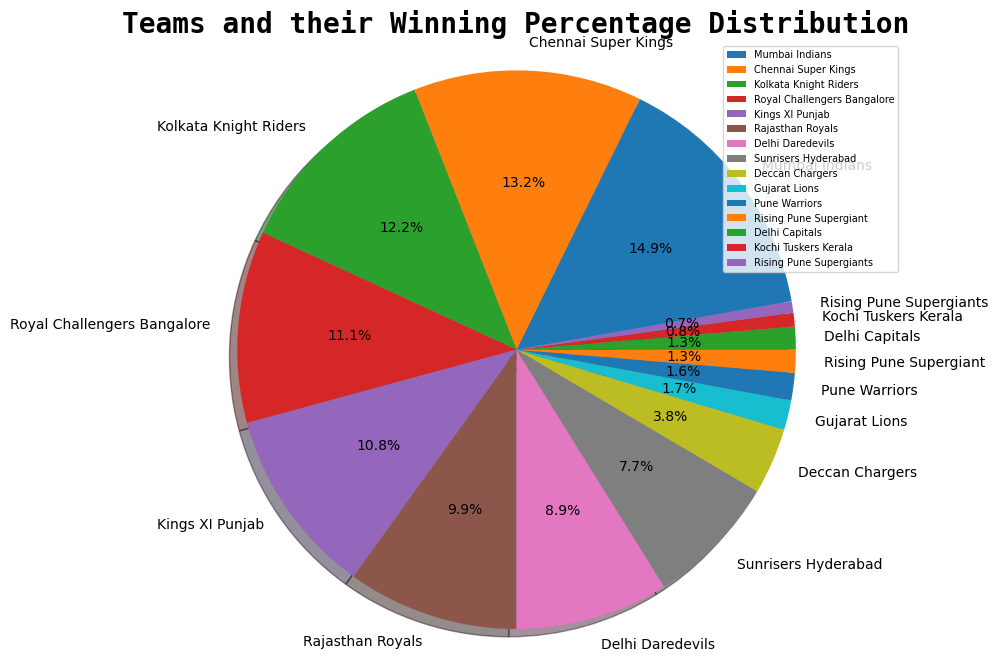

In [188]:
# Creating a pie chart 
ax = df['winner'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 8))
plt.pie(ax.values, labels=ax.index, startangle=10, explode=(None), shadow=True, autopct='%1.1f%%')
plt.title('Teams and their Winning Percentage Distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

Mumbai Indians and Chennai Super Kings are the Top Most Winners.

## Winning Team By Batting First

<Figure size 5000x1500 with 0 Axes>

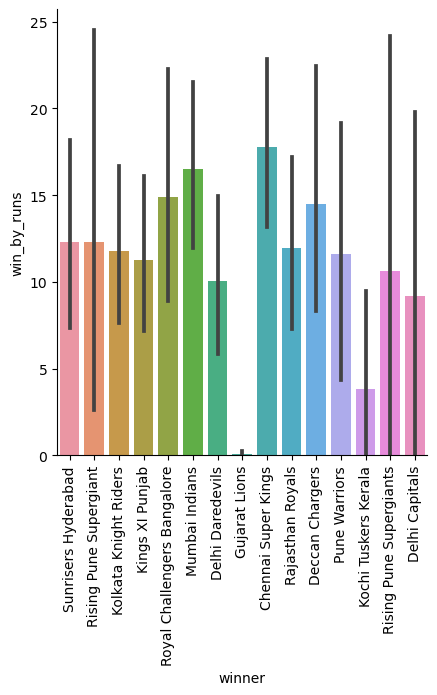

In [49]:
plt.figure(figsize=(50, 15))
sns.catplot(x="winner",y="win_by_runs",data=df,kind="bar")
plt.xticks(rotation=90)
plt.show()

Mumbai Indians and Chennai Super Kings are the top best teams batting first

## Winning Team - Batting Second (Chasing the target)

<Figure size 5000x1500 with 0 Axes>

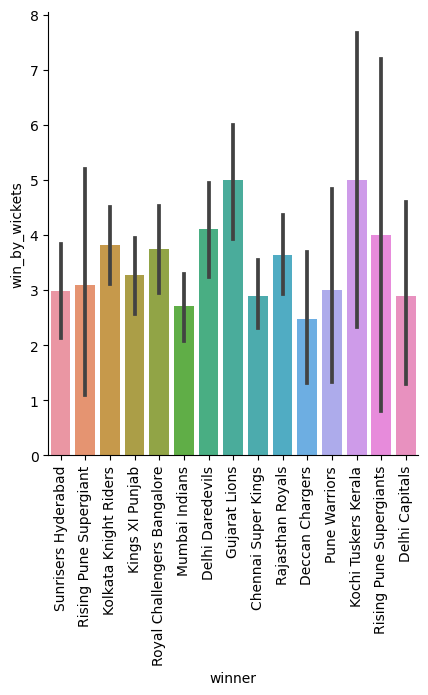

In [199]:
plt.figure(figsize=(50, 15))
sns.catplot(x="winner",y="win_by_wickets",data=df,kind="bar")
plt.xticks(rotation=90)
plt.show()

Gujarat Lions & Kochi Tusskers Kerala have more winning percentage chasing targets

## Toss Winning Teams who elect to Bat first

<Figure size 8000x7500 with 0 Axes>

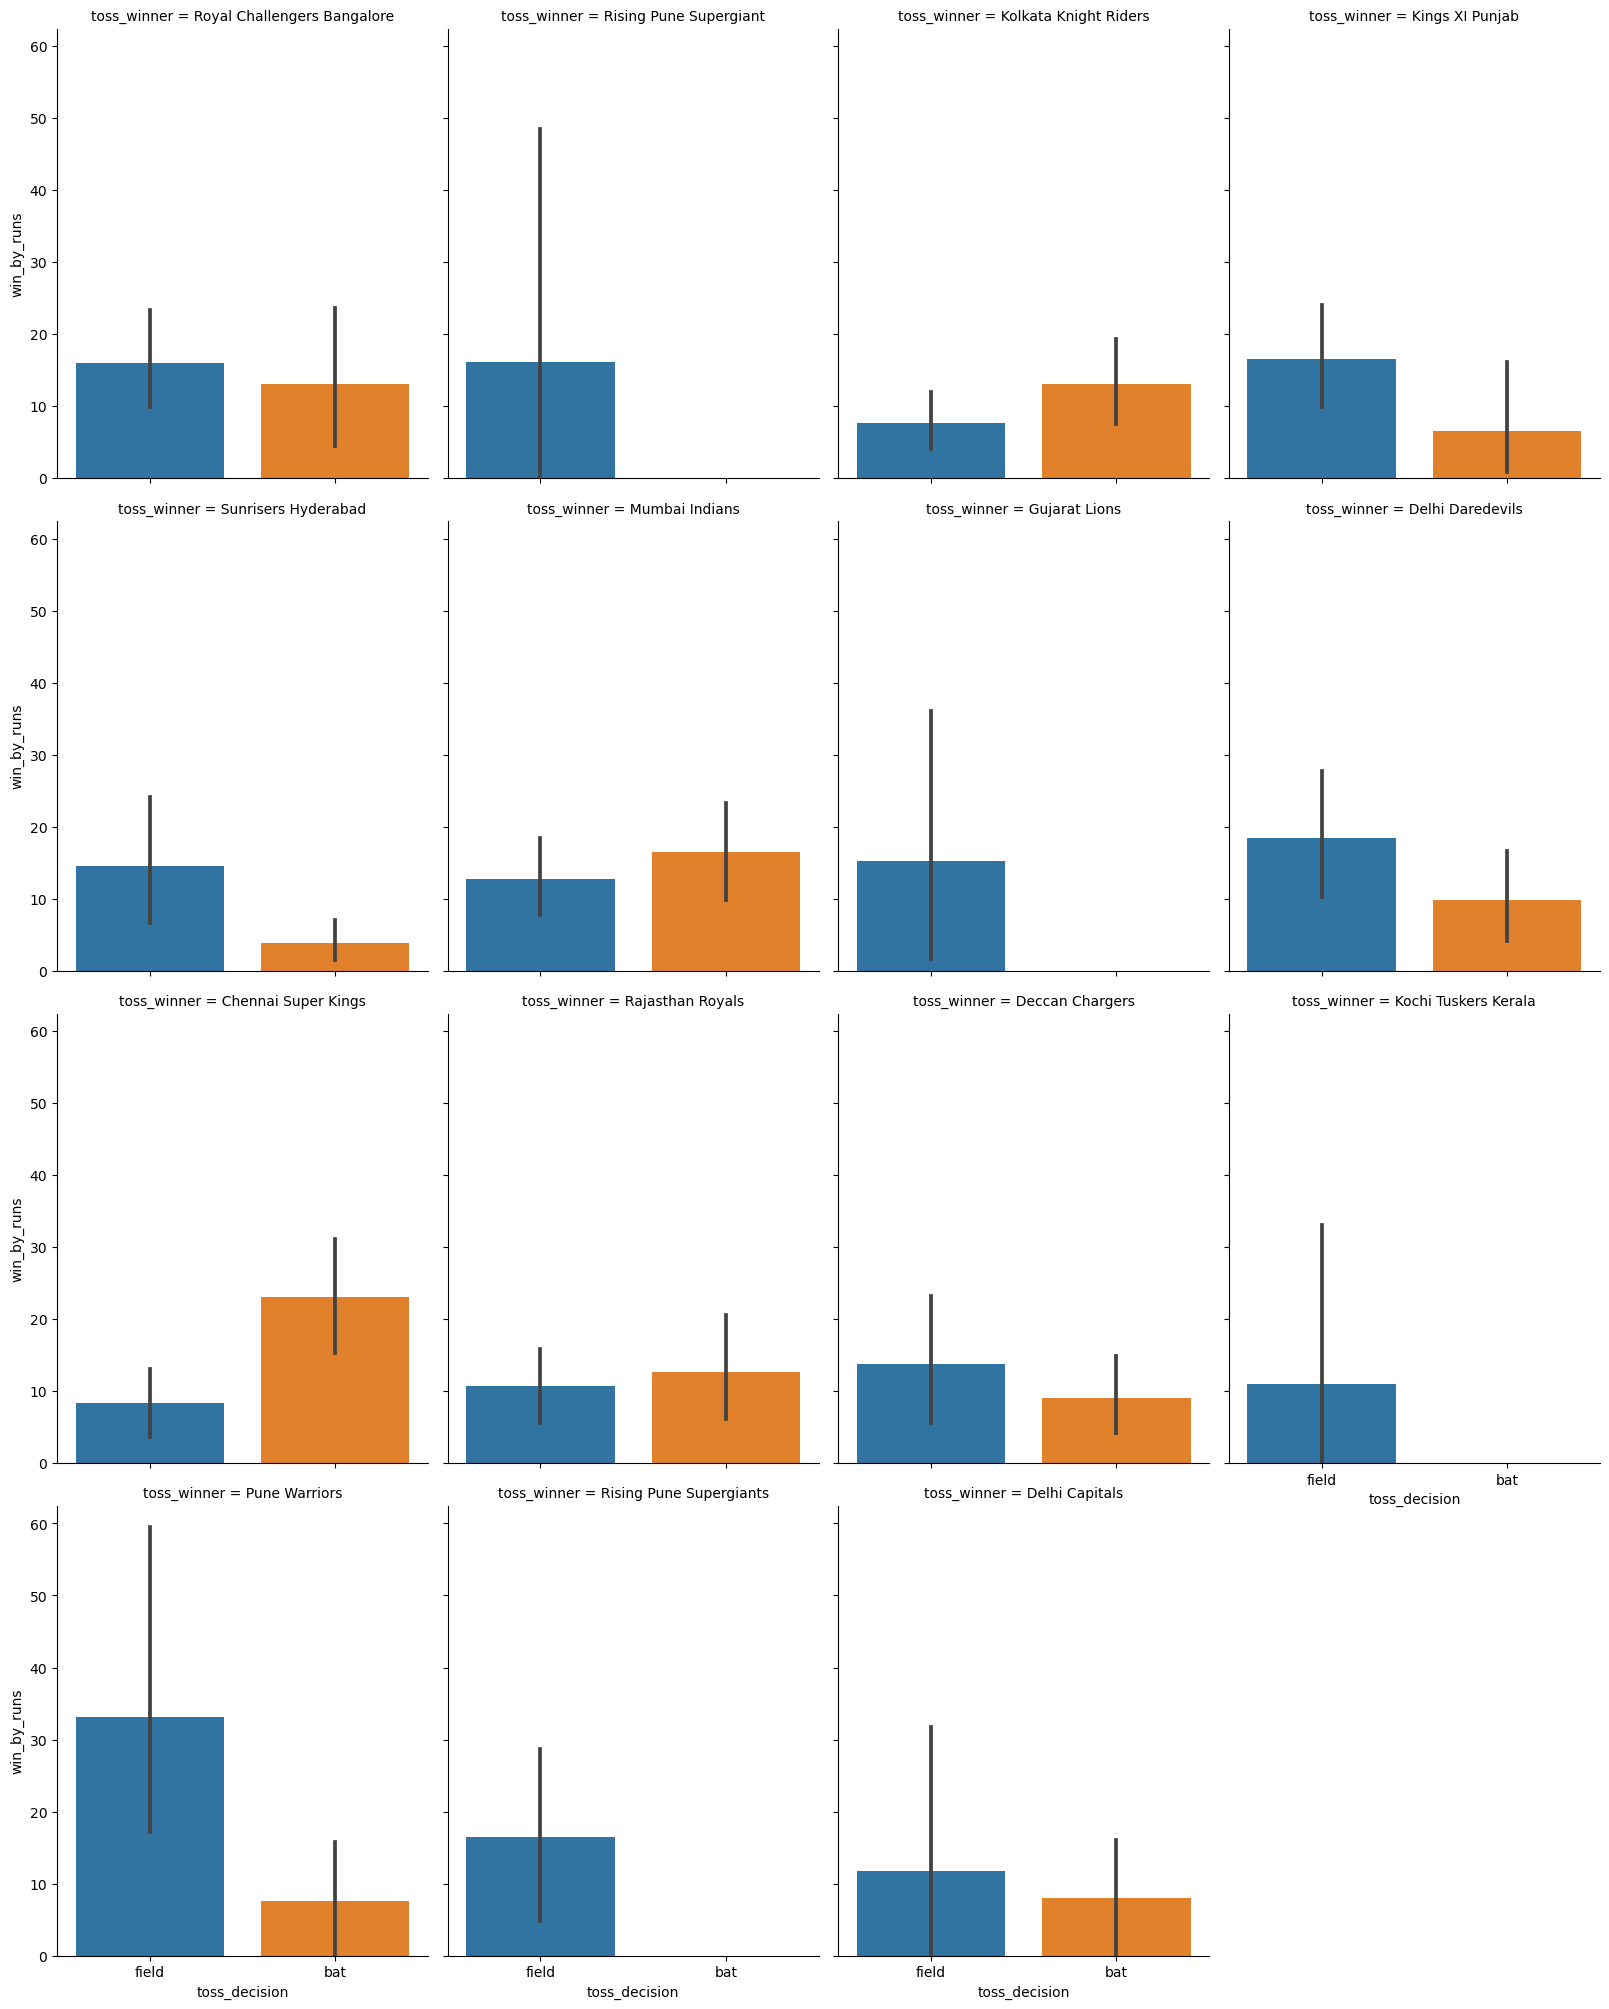

In [55]:
plt.figure(figsize=(80, 75))
sns.factorplot(x='toss_decision', y='win_by_runs', col='toss_winner', data=df, kind='bar', col_wrap=4, aspect=0.8)

Most of the time, Team that wins the toss & choose batting, they win the match. If they choose bowling, chances of winning becomes less.
Mumbai Indians & Chennai Super Kings are the Top winning teams considering them choosing batting post winning the toss.

## Toss Winning Teams & Choosing to Field

<Figure size 8000x7500 with 0 Axes>

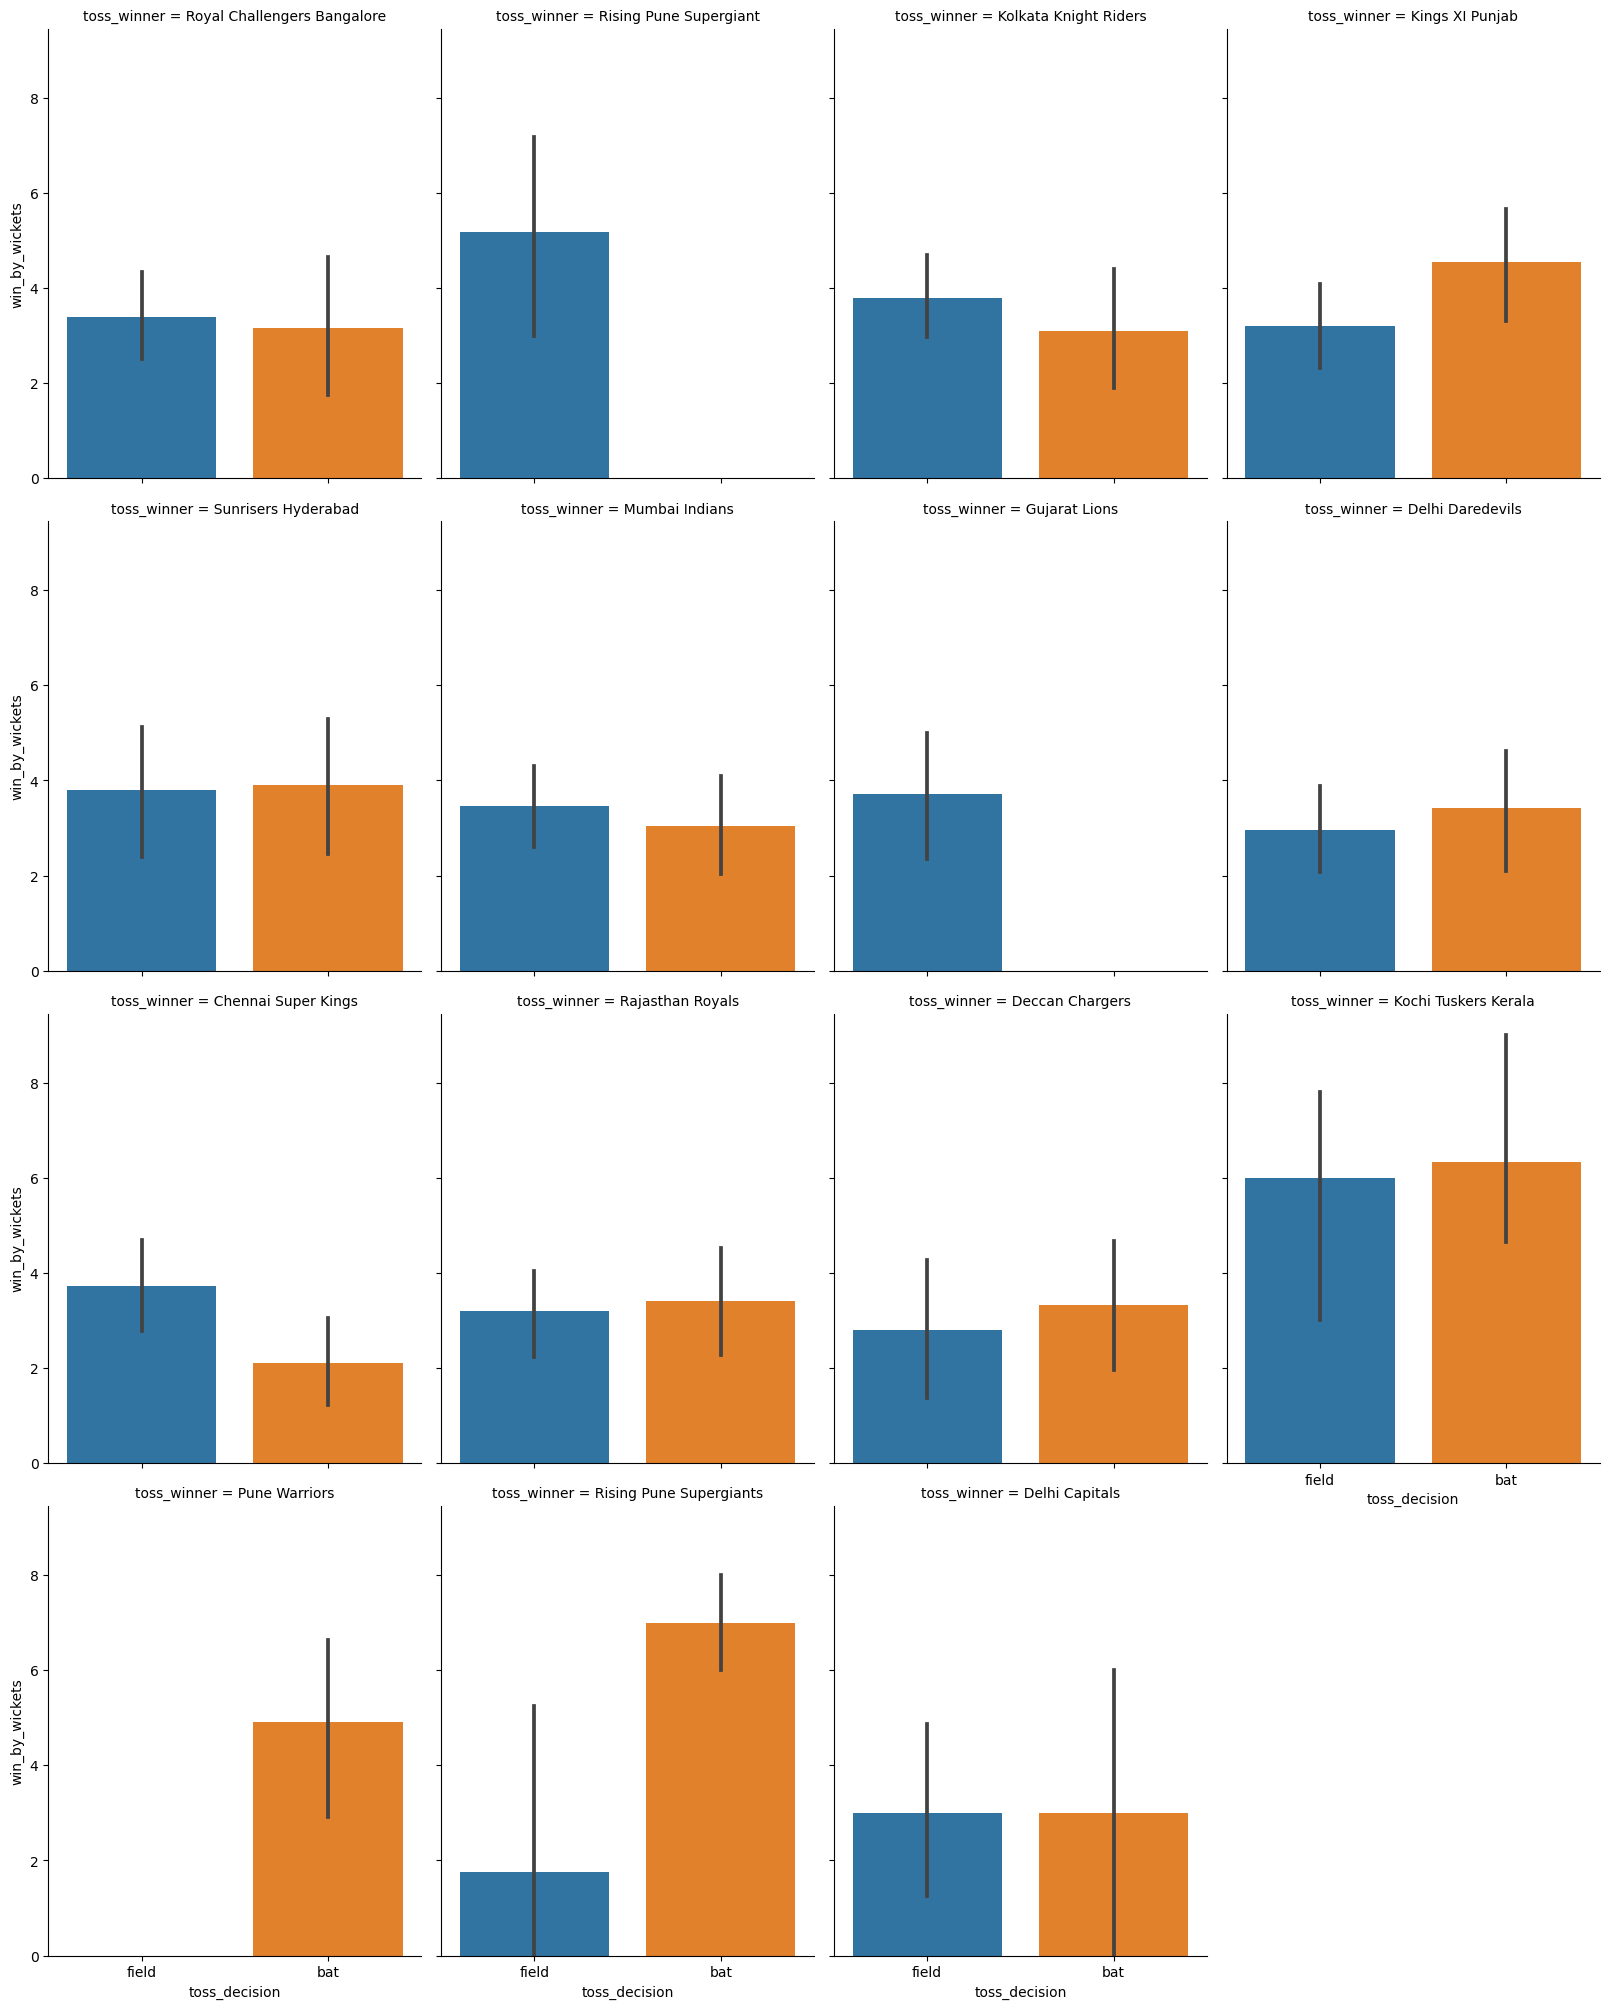

In [56]:
plt.figure(figsize=(80, 75))
sns.factorplot(x='toss_decision', y='win_by_wickets', col='toss_winner', data=df, kind='bar', col_wrap=4, aspect=0.8)

## Match Result State 

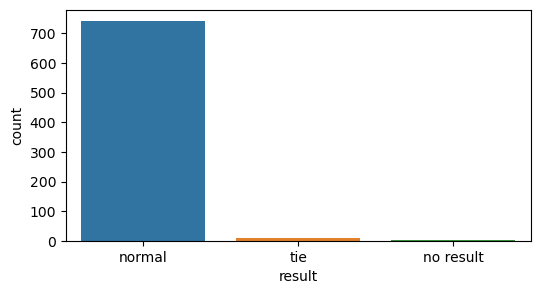

In [59]:
plt.figure(figsize=(6,3))
ax = sns.countplot(x="result", data=df)

All the matches ends with a result normal ie. Win or Loss. Chances of No result / Scores Tie are very less

## Player of the Match

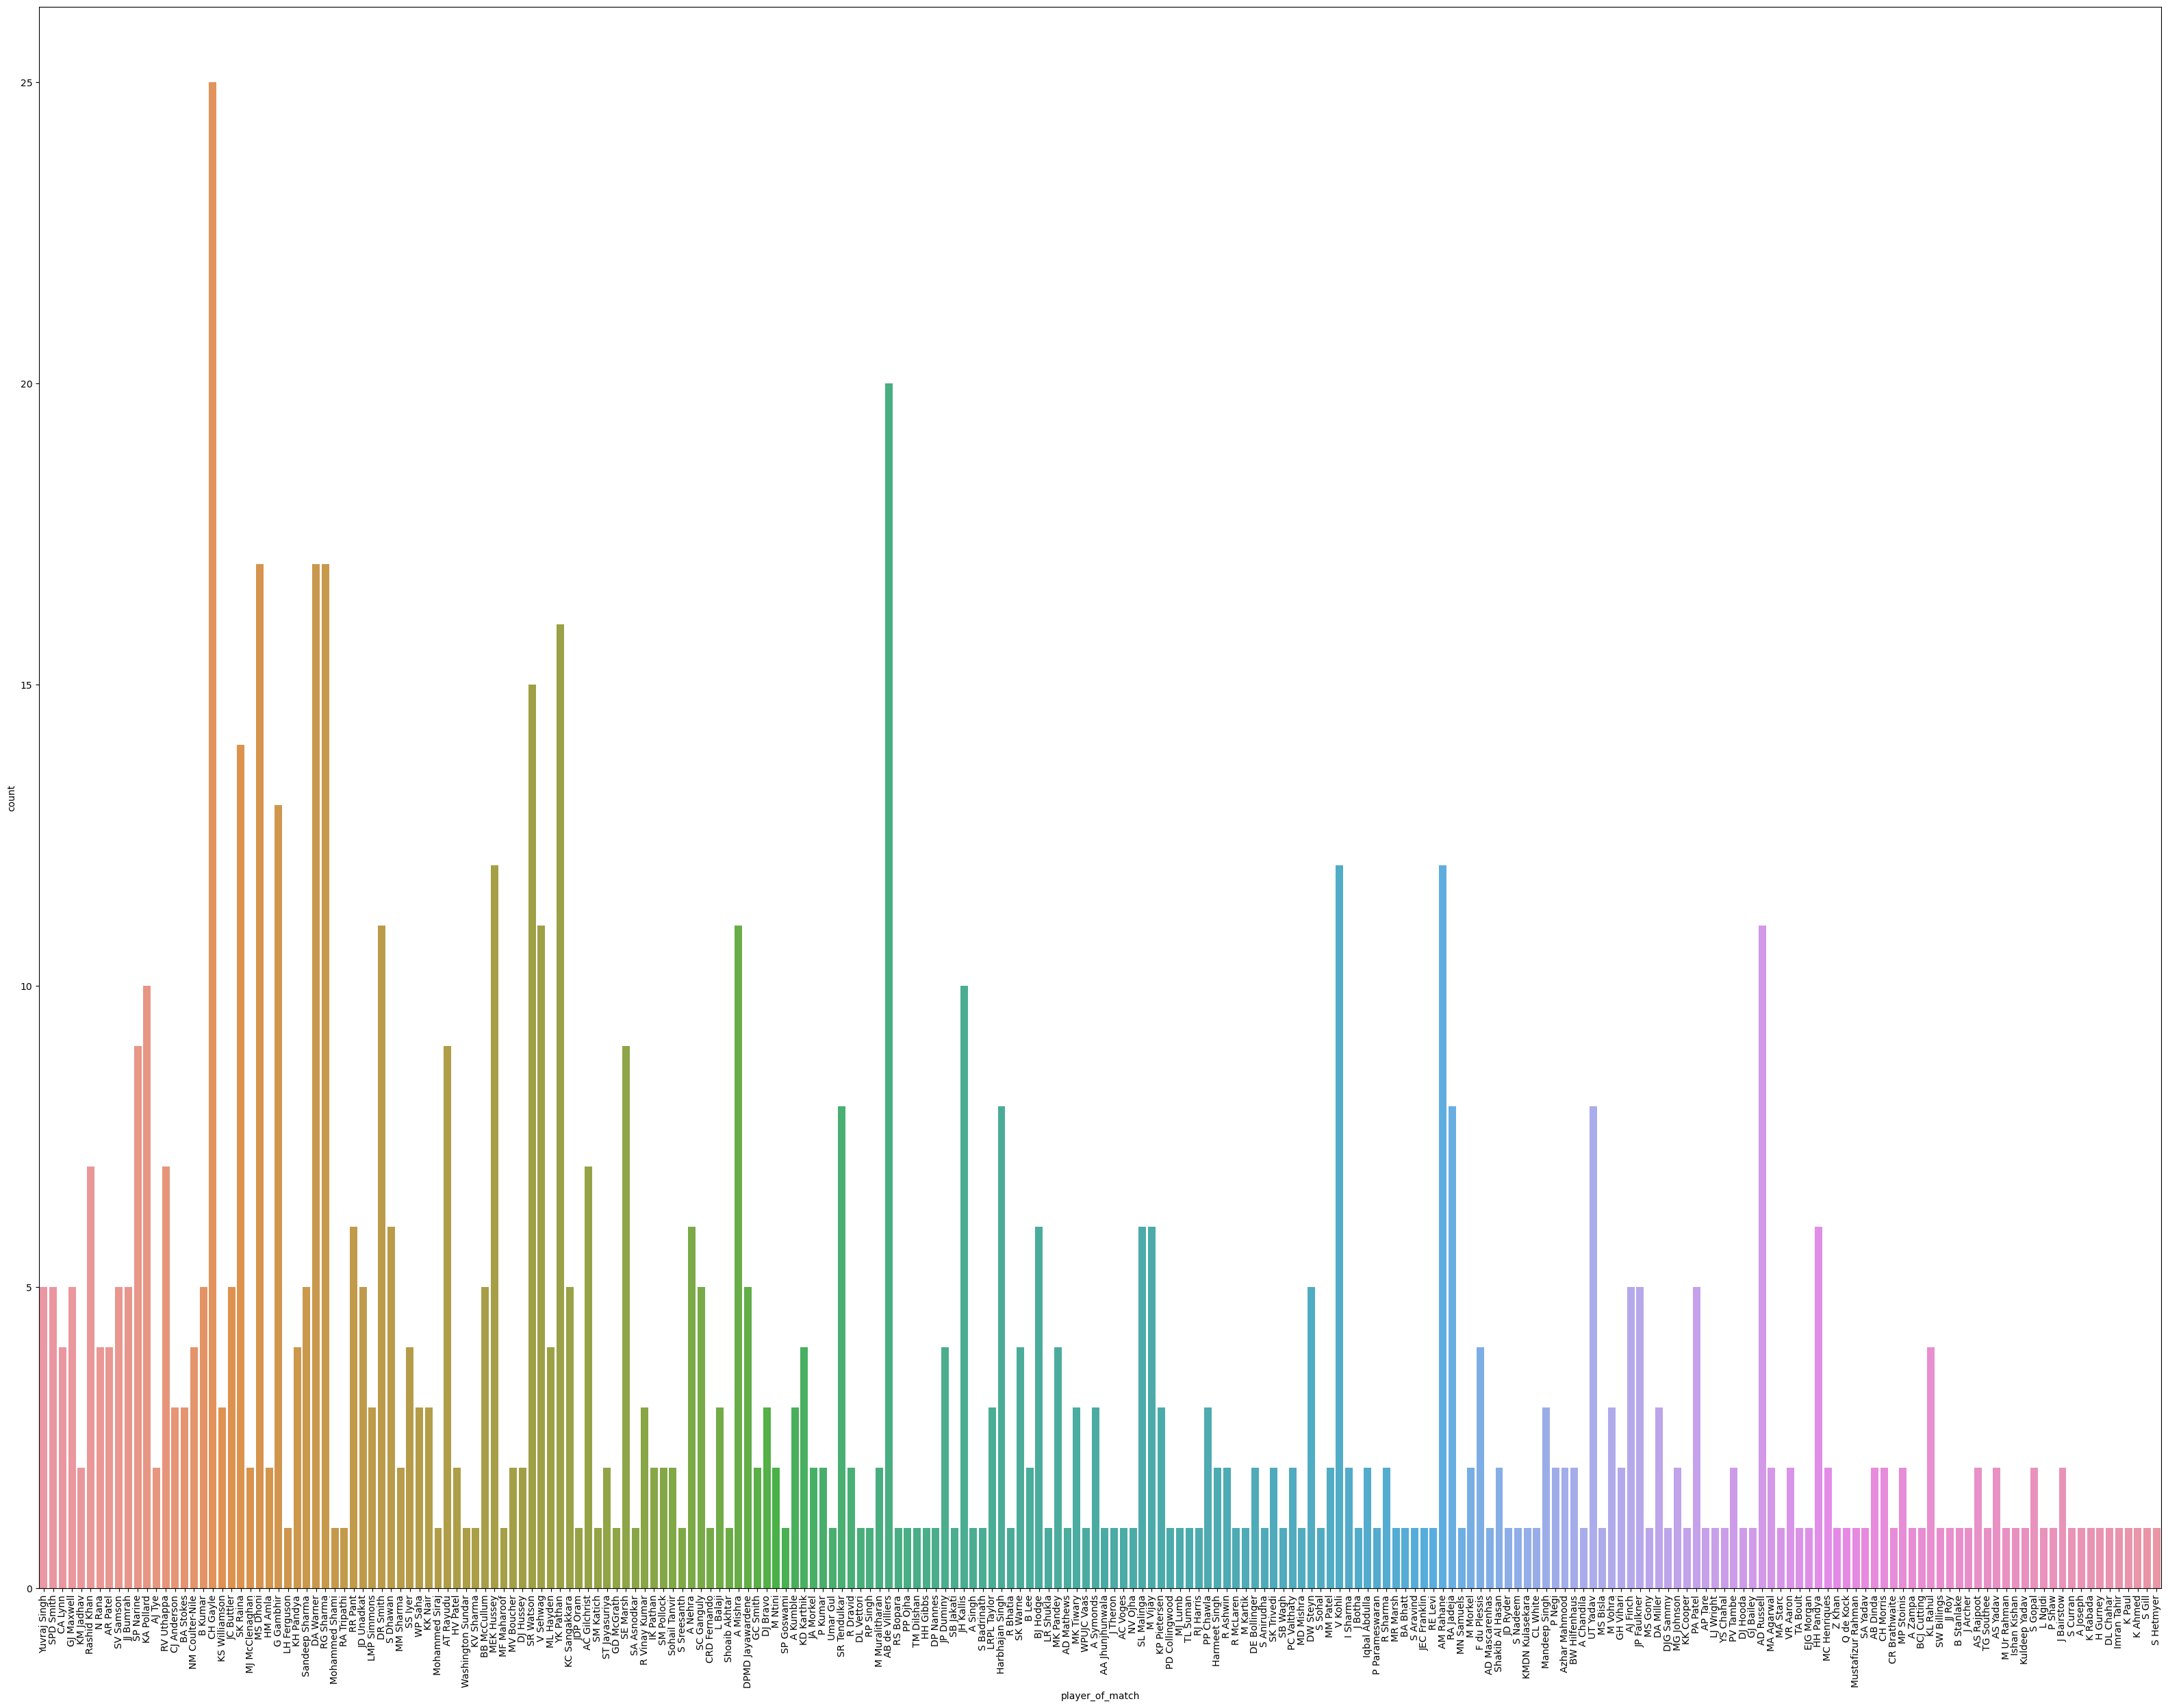

In [66]:
plt.figure(figsize=(40,30))
sns.countplot(x="player_of_match", data=df)
plt.xticks(rotation=90)
plt.show()

CH Gayle is leading Player of the Match awards with 25 counts to his name, whereas AB de Villiers comes the next, followed by Dhoni, Warner & Sehwag

## Player of the Match from Winning Team 

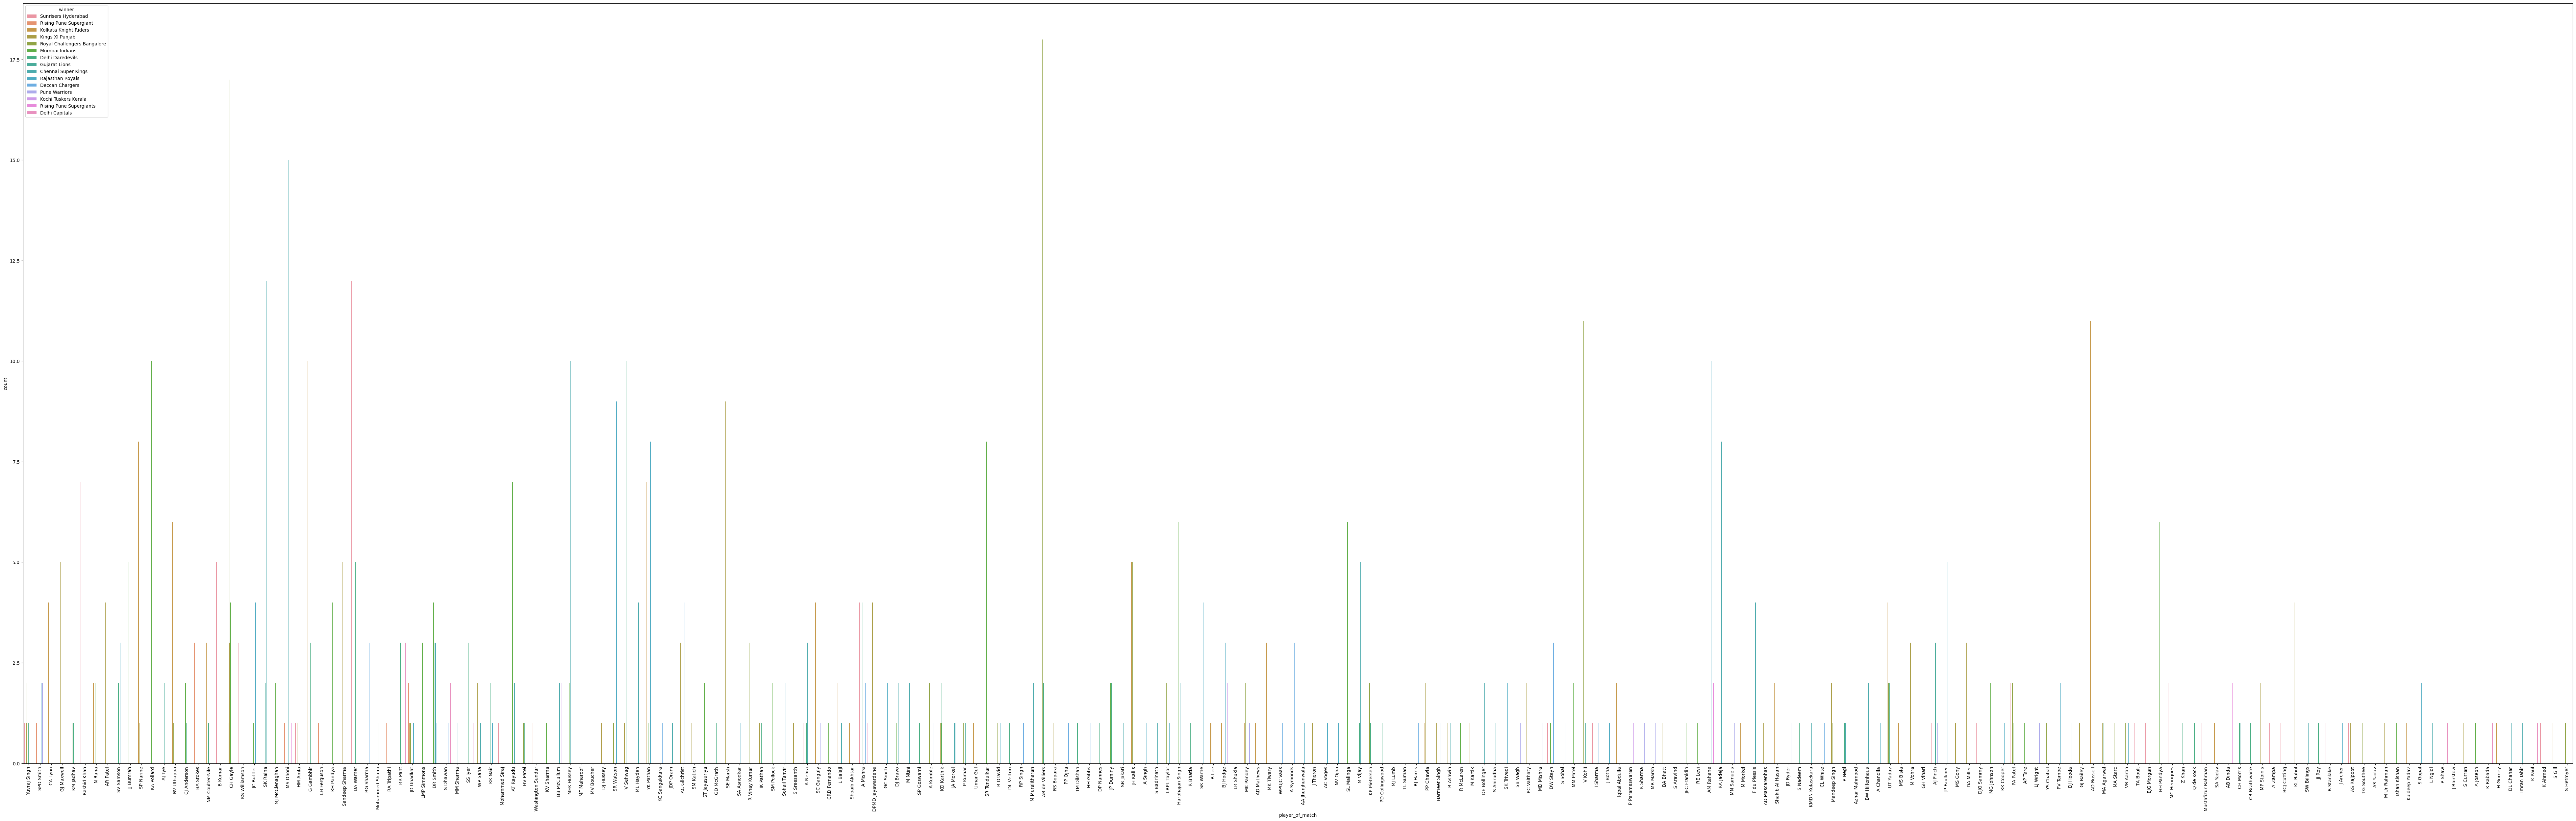

In [194]:
plt.figure(figsize=(100,30))
sns.countplot(x="player_of_match",hue="winner",data=df)
plt.xticks(rotation=90)
plt.show()

AB de Villiers & Chris Gayle has most caps for Player of the Match when their respective teams wins the match

## Player of the Match Analysis - Team Batting First

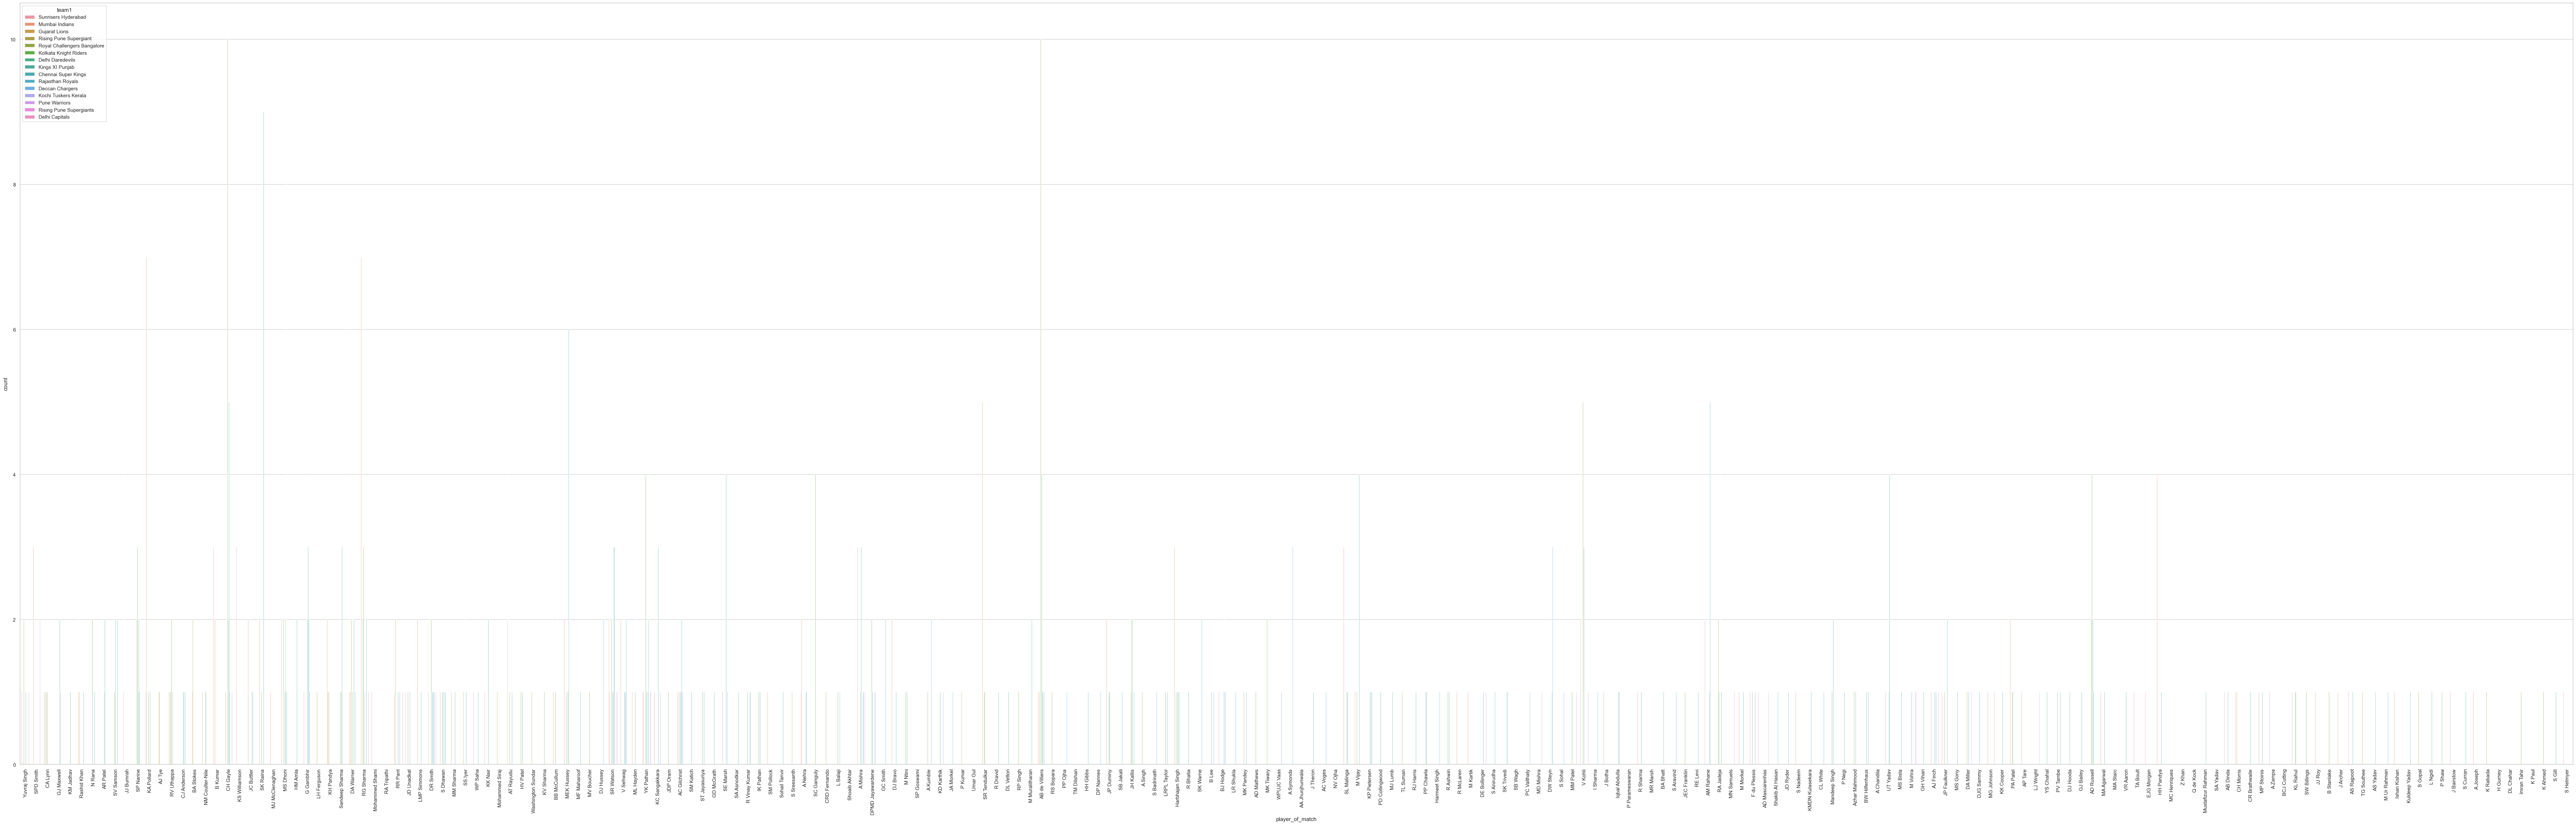

In [130]:
plt.figure(figsize=(100,30))
sns.countplot(x="player_of_match",hue="team1",data=df)
plt.xticks(rotation=90)
plt.show()

Chris Gayle & AB de Villiers again top the chart in winning Player of Match award if their teams choose to bat first

## Player of Match Analysis while Chasing Targets

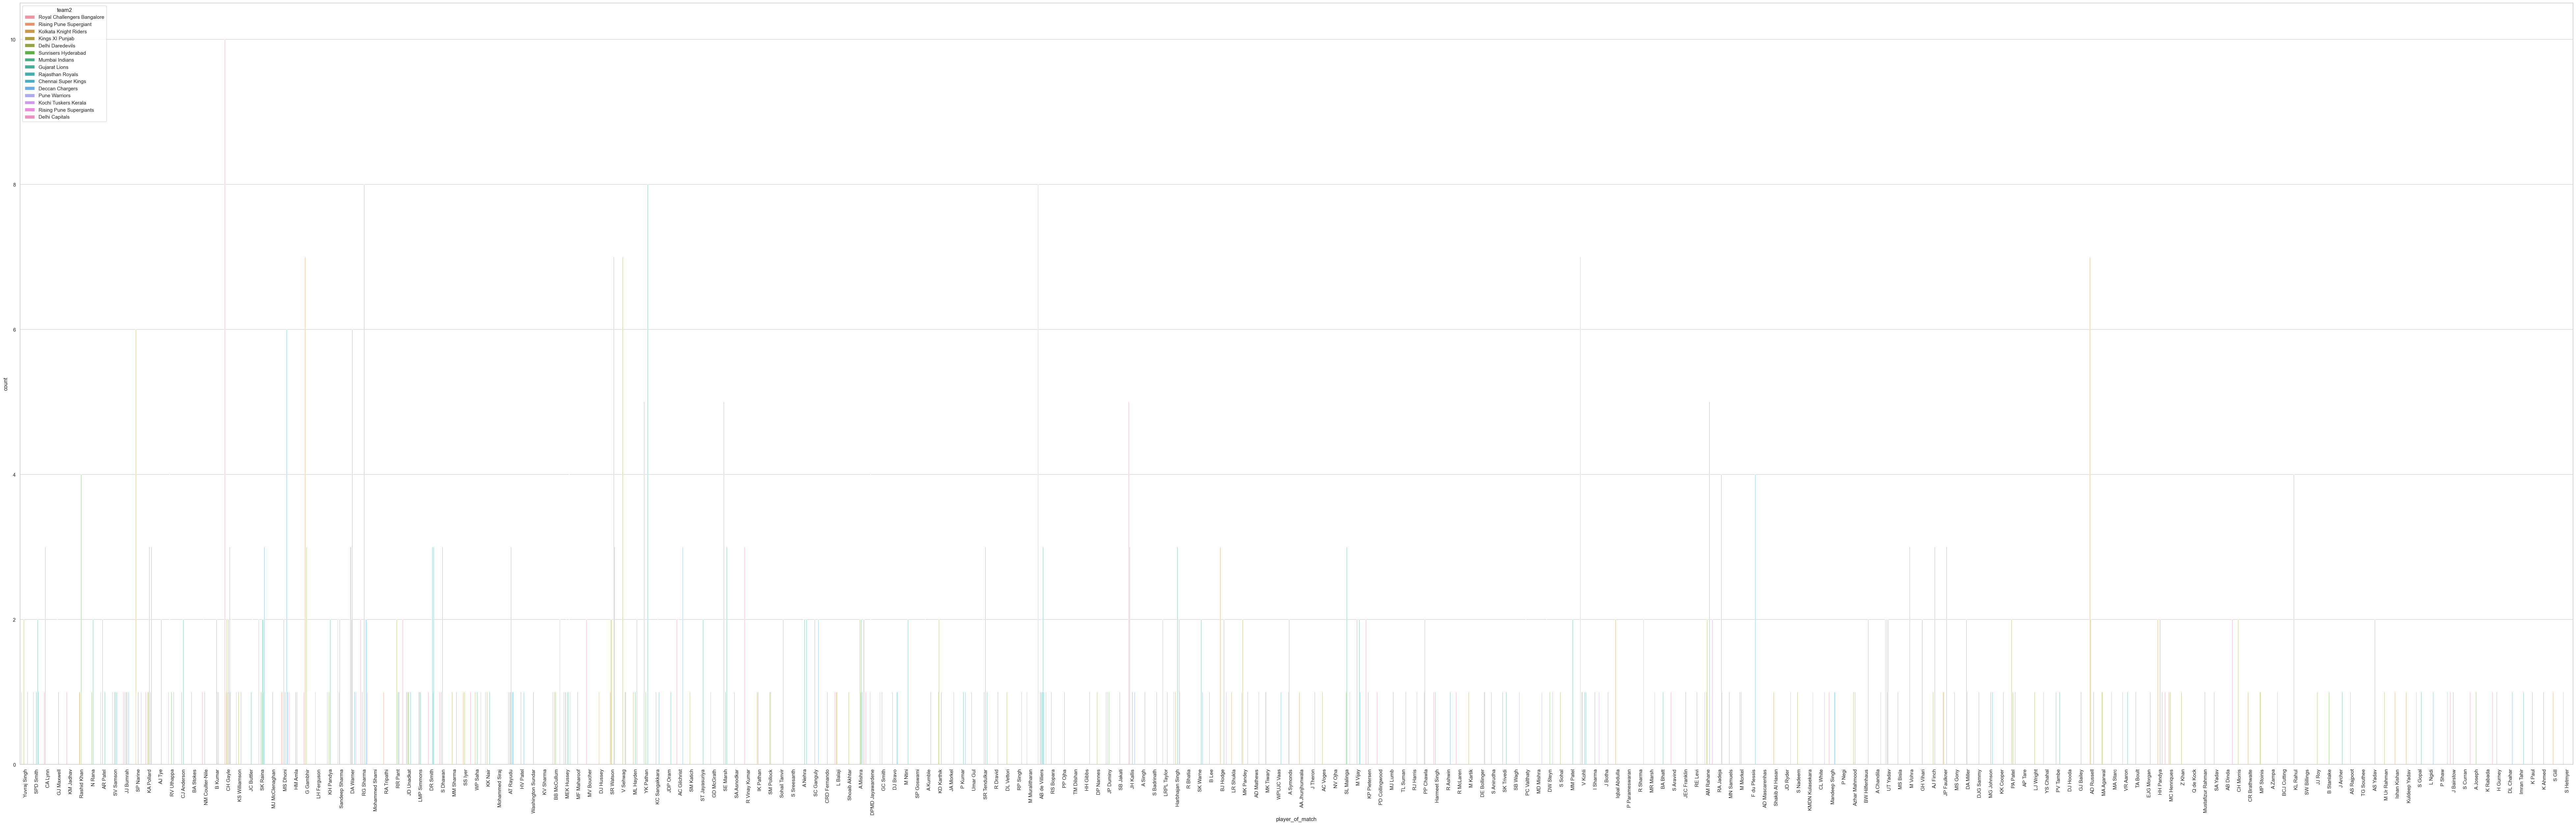

In [94]:
plt.figure(figsize=(100,30))
sns.countplot(x="player_of_match",hue="team2",data=df)
plt.xticks(rotation=90)
plt.show()

Chris Gayle & AB de Villiers help their team win matches while chasing targets & gets Player of match awards followed by Rohit Sharma & Yusuf Pathan

## Match Win Ratio - By Winning Toss & Choosing to Field / Bat

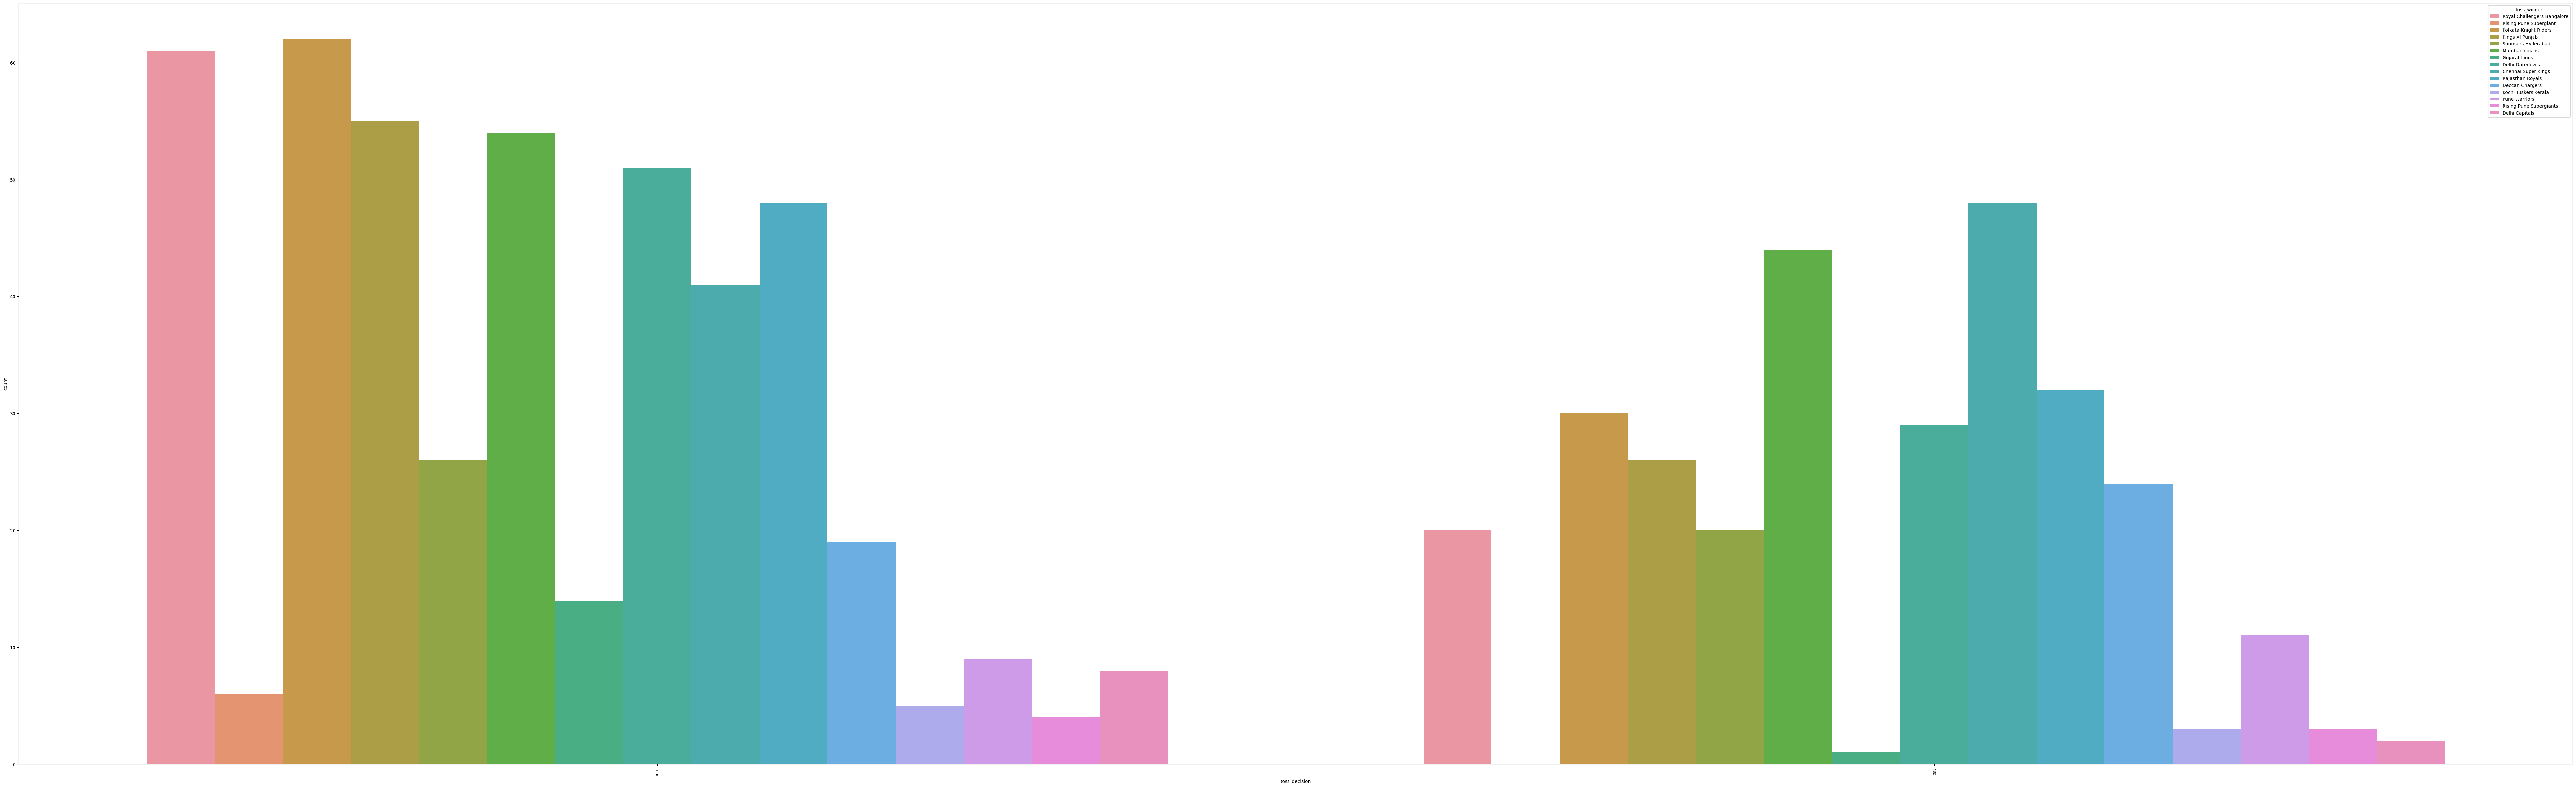

In [195]:
plt.figure(figsize=(100,30))
sns.countplot(x="toss_decision",hue="toss_winner",data=df)
plt.xticks(rotation=90)
plt.show()

Winning the toss & electing to field / bowl - Royal Challengers Bangalore  leads most number of wins, followed by Kolkata Knight riders. 
Winning the toss & electing to bat - Chennai Superkings tops the chart, followed by Mumbai Indians

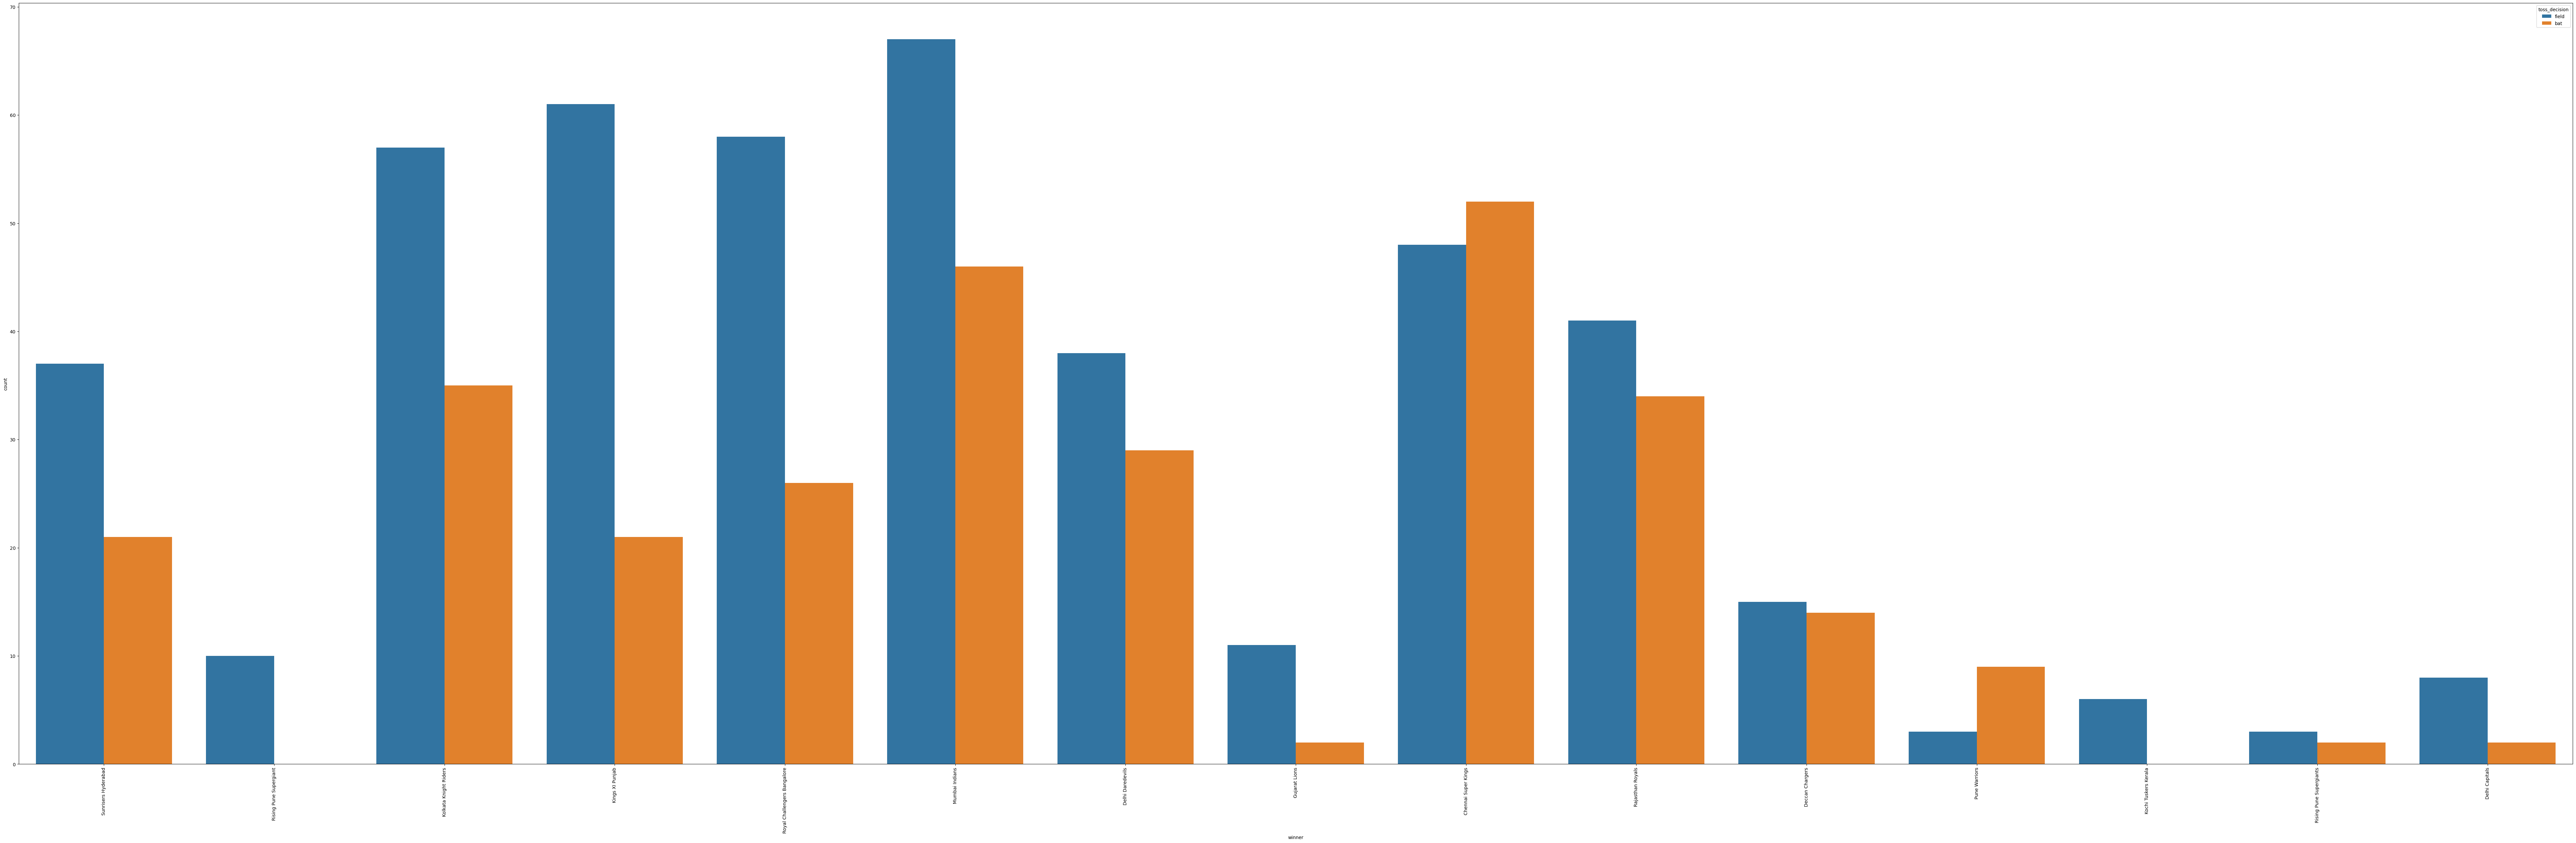

In [196]:
plt.figure(figsize=(100,30))
sns.countplot(x="winner",hue="toss_decision",data=df)
plt.xticks(rotation=90)
plt.show()

Mumbai Indians & Kings Xi Punjab winning ratio is higher when they chose to field 

CSK tops the list for high winning percentage when they chose to bat followed by Mumbai Indians

## Top List of Umpire Appearances Across Seasons

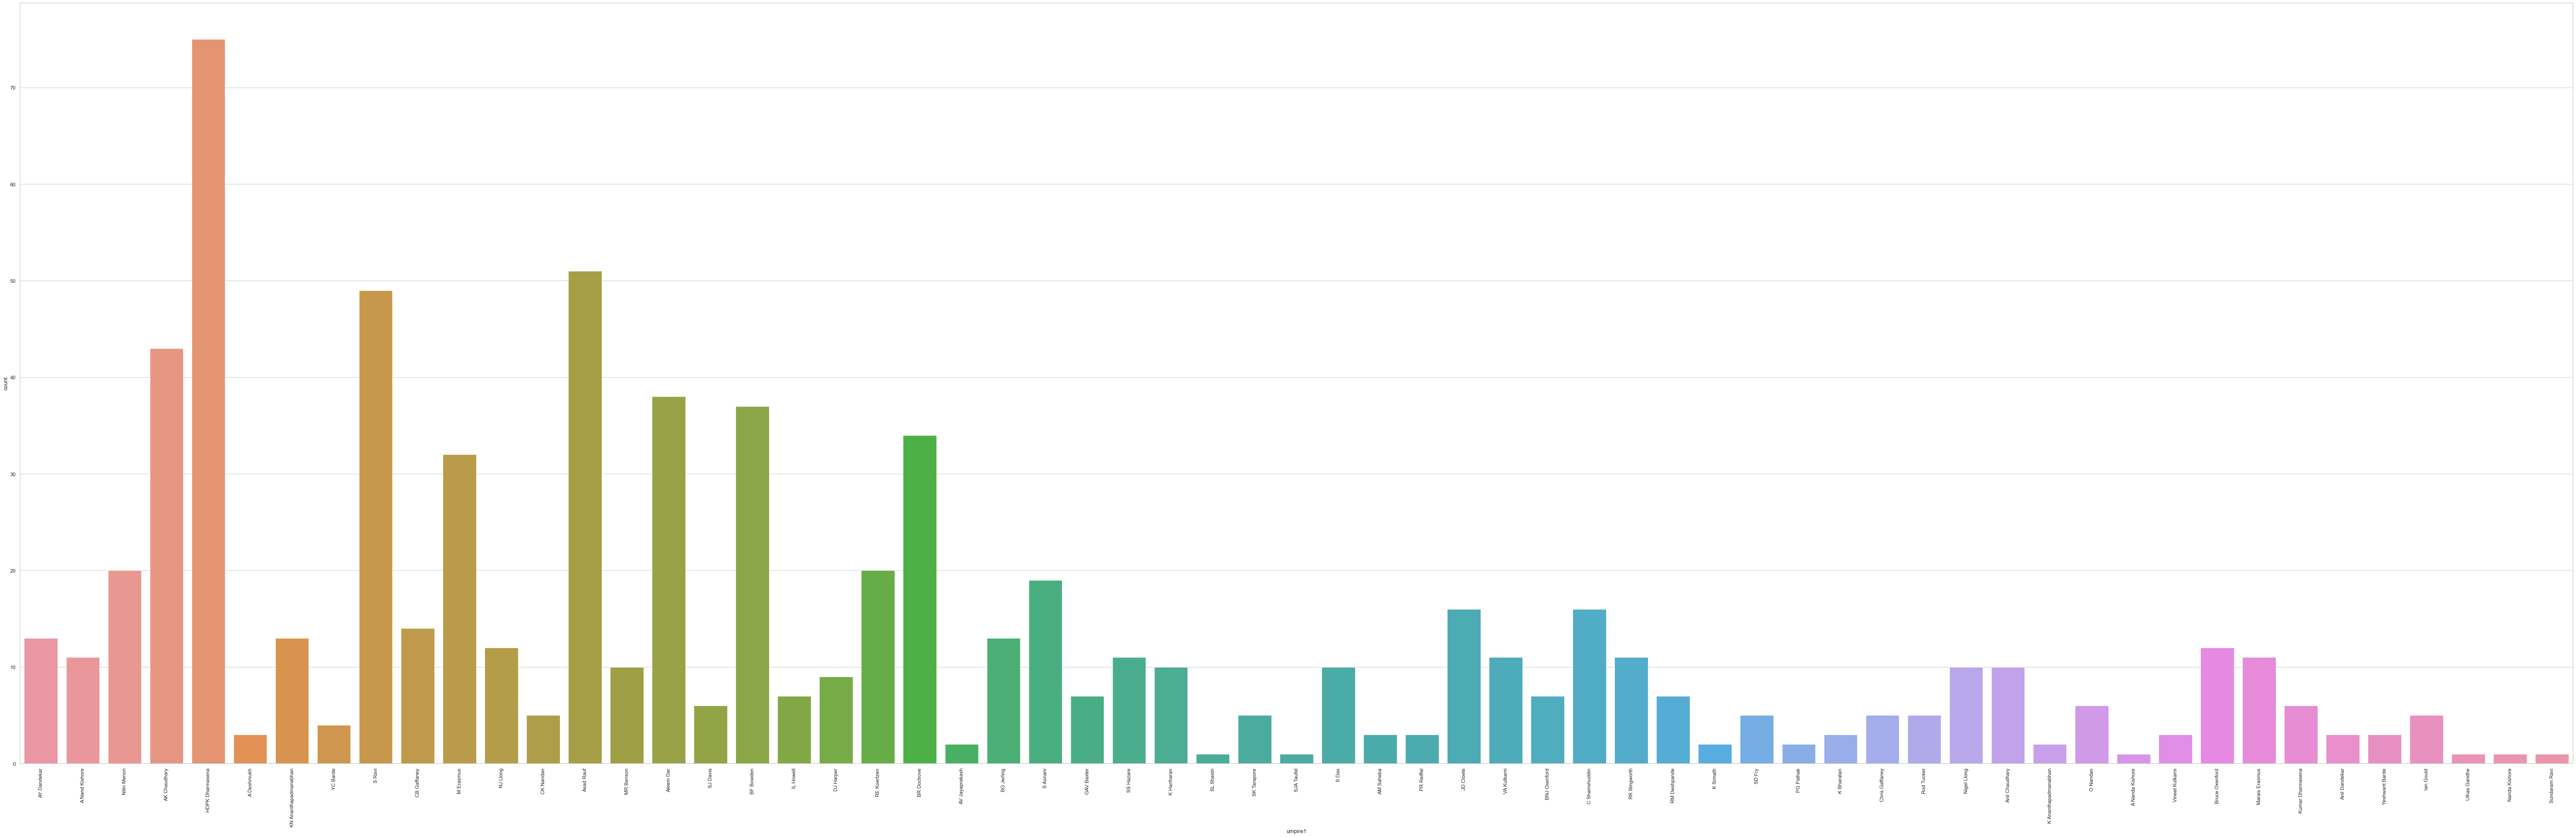

In [101]:
plt.figure(figsize=(100,30))
sns.countplot(x="umpire1",data=df)
plt.xticks(rotation=90)
plt.show()

Kumara Dharmasena & Asad Rauf lead the more number of Appearances as "Umpire 1" across the seasons

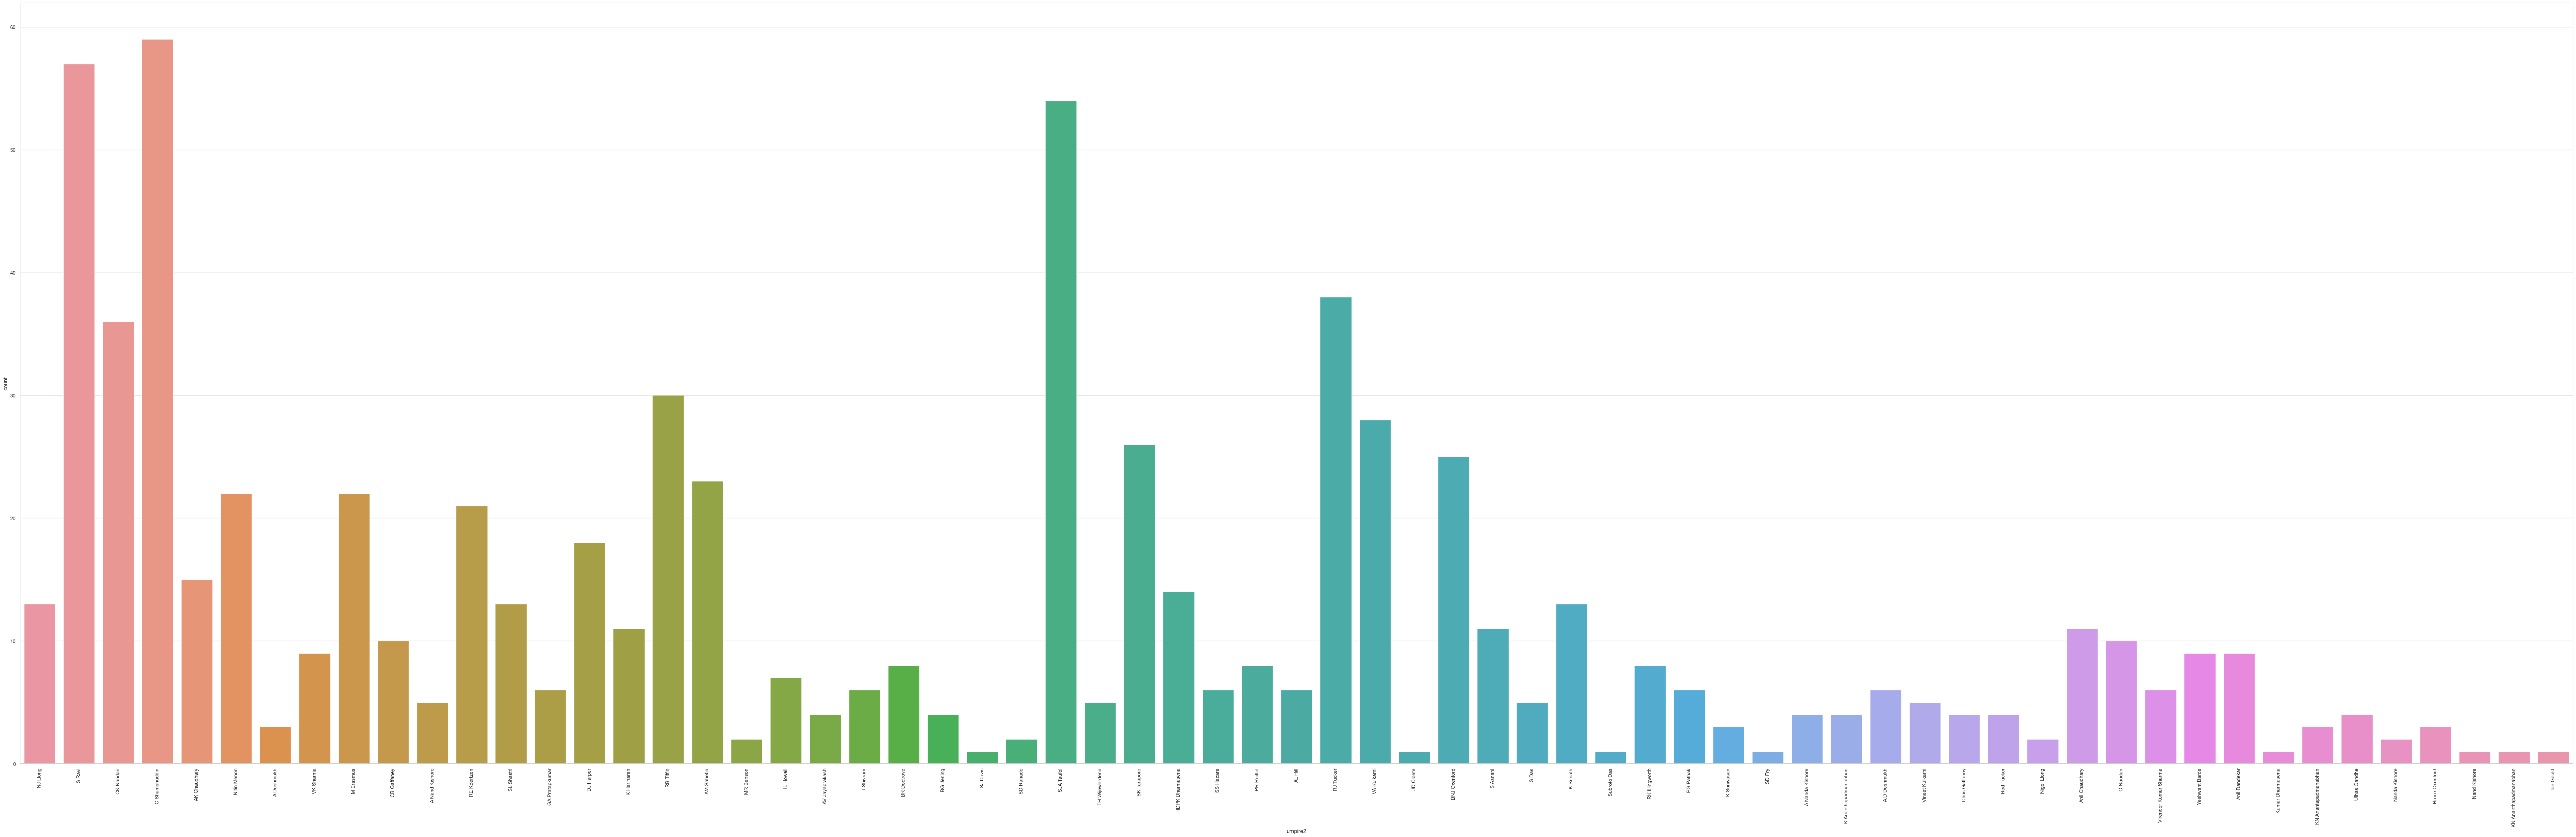

In [102]:
plt.figure(figsize=(100,30))
sns.countplot(x="umpire2",data=df)
plt.xticks(rotation=90)
plt.show()

Shamshuddin, S Ravi & Simon Taufel top the list of most appearances for Umpire 2

## Most Matches Held Analysis - Across Seasons

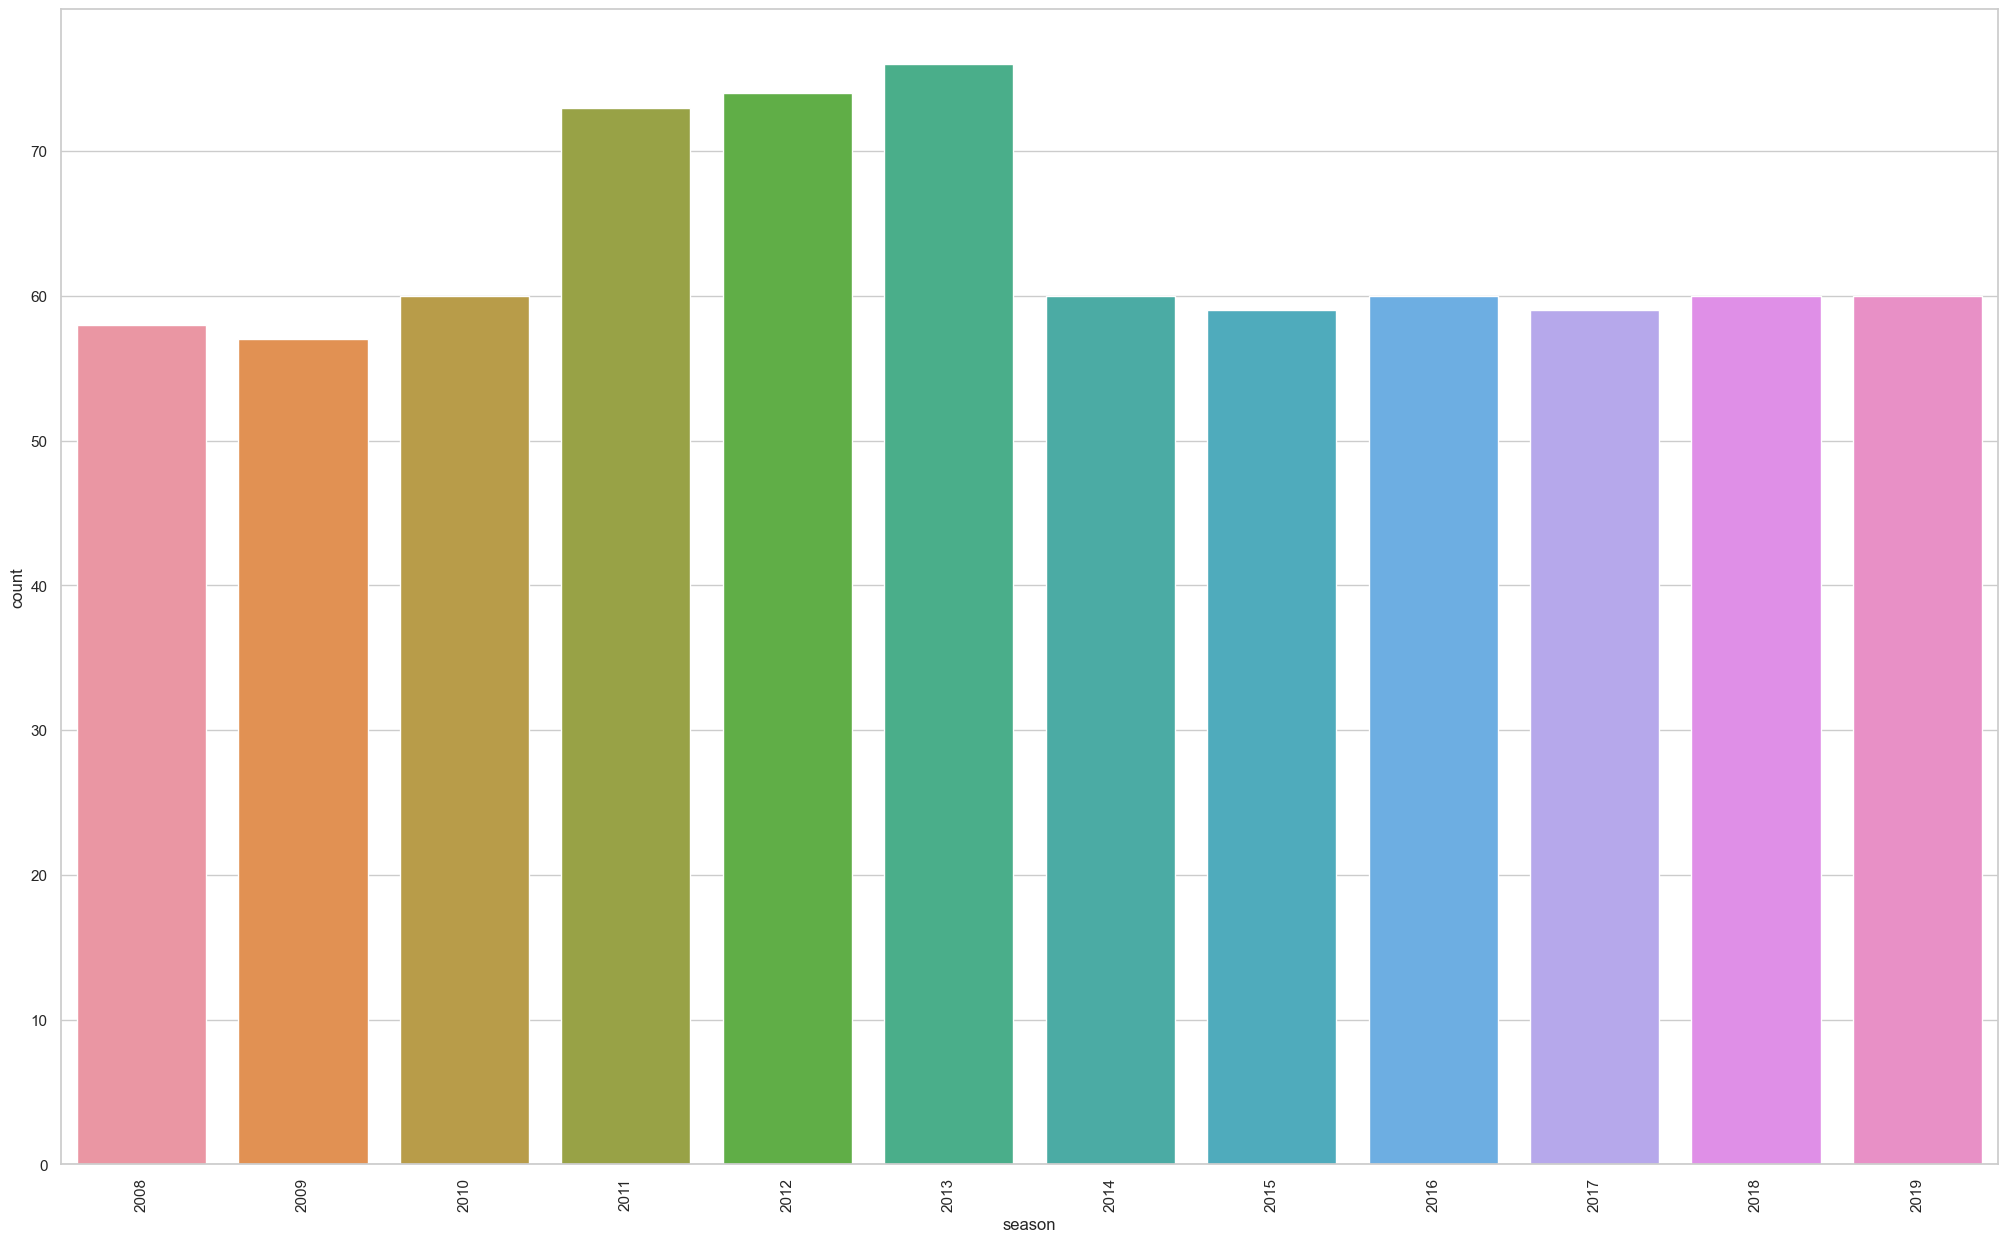

In [128]:
plt.figure(figsize=(25,15))
sns.countplot(x='season',data=df)
plt.xticks(rotation=90)
plt.show()

2013 & 2012 IPL Season saw more number of matches considering more number of teams played in that season

## Highest Run Scoring Analysis across Overs

<Figure size 5000x1500 with 0 Axes>

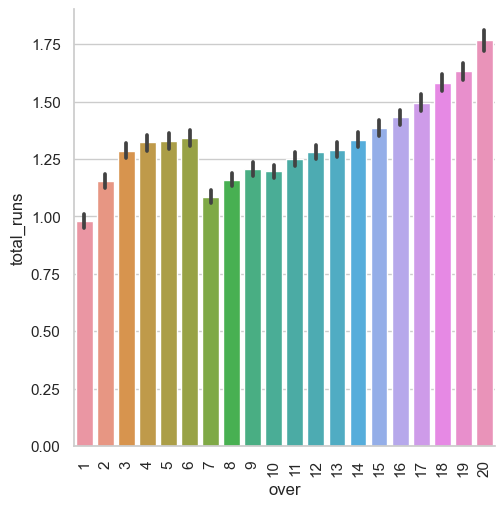

In [147]:
plt.figure(figsize=(50, 15))
sns.catplot(x="over",y="total_runs",data=df1,kind="bar")
plt.xticks(rotation=90)
plt.show()

Closing overs of T20 i.e from 18 ~ 20 see most number of runs scored in the match

## Most Matches Held Across Venues

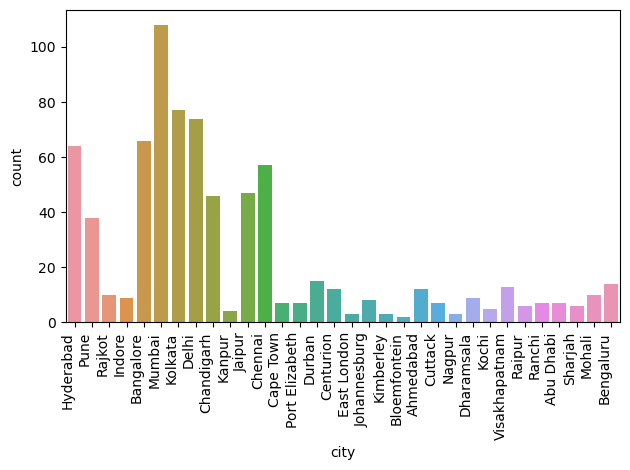

In [219]:
ax = sns.countplot(x="city", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

Mumbai, Kolkata & Delhi has hosted more number of matches across various IPL seasons

## Total Match Runs Correlation with Runs Scored by Batsman Excluding Extras (Wides, No Balls & Byes)

<AxesSubplot:xlabel='batsman_runs', ylabel='total_runs'>

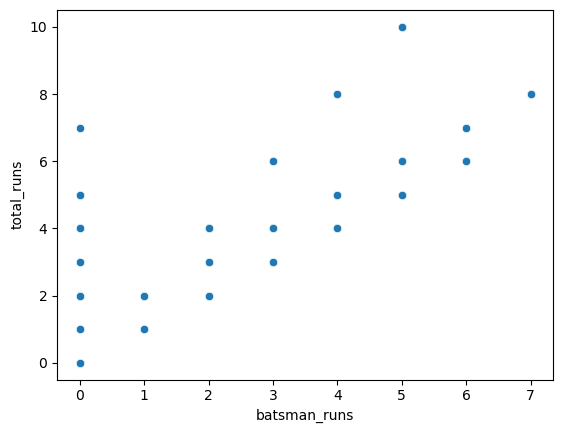

In [221]:
sns.scatterplot(x="batsman_runs",y="total_runs",data=df1)

## Analysis of Total Runs Given by Bowling Teams 

<Figure size 5000x1500 with 0 Axes>

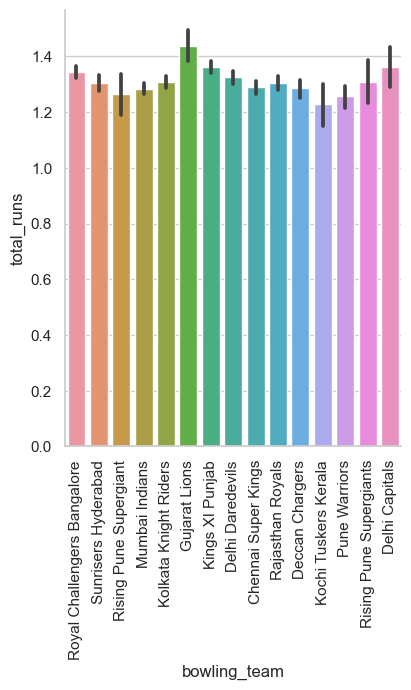

In [177]:
plt.figure(figsize=(50, 15))
sns.catplot(x="bowling_team",y="total_runs",data=df1,kind="bar")
plt.xticks(rotation=90)
plt.show()

Delhi Capitals & Gujarat Lions seems to have given away most runs while bowling (inverse) Opponent team has scored more against these teams

Key insights: Total runs mainly depends on batmans runs,over,innings etc.,